In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load warnings (to remove warnings)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# import sklearn libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# import scaler, imputer, encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

# load timer
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

# load sound player
from IPython.lib.display import Audio
# sound_file = '/home/msds2022/kcamacho/run_chime.mp3'
sound_file = '/Users/kash/Downloads/run_chime.mp3'

# Audio(sound_file, rate = 4410, autoplay=True)

time: 439 µs (started: 2021-09-13 19:17:08 +08:00)


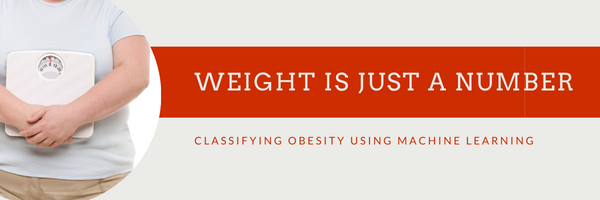

# Executive Summary

Obesity is a health problem that can lead to increased risk of diseases and other health problems. Ensuring a health population is one of the concerns of governments and schools. This study applied different machine learning models to classify obesity and find out what are the top predictors of obesity. 

The model with the best accuracy is the `Gradient Boosting Method with an accuracy of 90.56%, better than the PCC of 62.89%`. `Age` is the top predictor of obesity, followed by `family history of obesity`, `frequency of consumption of vegetables`(inverse relationship) and `time using devices`. For policy making related to obesity, we may want to target increasing consumption of vegetables and lessening time spent in front of gadgets to help lower the obesity rate of a jurisdiction.

Extension of learning beyond what was discussed in class include the use of `GridSearchCV` (improved AutoML code) and exploration of other classifiers such as `Adaboost` and `Voting Classifier`.

# Dataset Description

The data is the obesity dataset from UCI. This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

The data contains **17 attributes and 2111 records**, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Attributes related to eating habits**

`FAVC`:  Frequent consumption of high caloric food (FAVC) [yes, no]

`FCVC`:  Frequency of consumption of vegetables(FCVC) [1: never, 2: sometimes: 3: always]

`NCP` :  Number of main meals (NCP) [1,2,3,4]

`CAEC`:  Consumption of food between meals (CAEC) [sometimes, frequently, always, no]

`CH20`:  Consumption ofwater daily (CH20) [1,2,3 in liters]

`CALC`:  Consumption of alcohol (CALC) [Sometimes, frequently, always, no]

**Attributes related with the physical condition**

`SCC`    :  Calories consumption monitoring (SCC) [yes, no]

`FAF`    :  Physical activity frequency (FAF) [0:none, 1:1 to 2 days, 2: 2 to 4 days, 3: 4 to 5 days]

`TUE`    :  Time using technology devices (TUE) [0: 0-2hrs, 1: 3-5hrs, 2: more than 5 hrs]

`MTRANS` :  Transportation used (MTRANS) [public transpo, automobile, walking, motorbike, bike]

**Other variables**

`Gender` 

`Age`

`Height`

`Weight`

`FAM` : Family history of obesity

`SMOKE` : smoker

Original Source: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+ 

Obesity is defined based on the BMI, which is computed as :

**Body Mass Index = Weight (in kg)/Height (in m)**

-Underweight Less than 18.5

-Normal 18.5 to 24.9

-Overweight 25.0 to 29.9

-Obesity I 30.0 to 34.9

-Obesity II 35.0 to 39.9

-Obesity III Higher than 40



# 1: Data Pre-processing and Cleaning

The dataset was preprocessed by checking for null values, renaming columns and making the class labels for obesity. Categorical data was also One-Hot-Encoded. It may be noted that the data is mostly balanced since 77% of the data was generated using SMOTE and WEKA filter.

In [2]:
dfo = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dfo = dfo.rename(columns = {'family_history_with_overweight': 'FAM',
                         'NObeyesdad':'Obesity'},
               inplace = False)
dfo

,Gender,Age,Height,Weight,FAM,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


time: 34.2 ms (started: 2021-09-13 19:17:08 +08:00)


In [3]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   2111 non-null   object 
 1   Age      2111 non-null   float64
 2   Height   2111 non-null   float64
 3   Weight   2111 non-null   float64
 4   FAM      2111 non-null   object 
 5   FAVC     2111 non-null   object 
 6   FCVC     2111 non-null   float64
 7   NCP      2111 non-null   float64
 8   CAEC     2111 non-null   object 
 9   SMOKE    2111 non-null   object 
 10  CH2O     2111 non-null   float64
 11  SCC      2111 non-null   object 
 12  FAF      2111 non-null   float64
 13  TUE      2111 non-null   float64
 14  CALC     2111 non-null   object 
 15  MTRANS   2111 non-null   object 
 16  Obesity  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB
time: 9.93 ms (started: 2021-09-13 19:17:08 +08:00)


In [4]:
dfo['Obesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

time: 2.18 ms (started: 2021-09-13 19:17:08 +08:00)


In [5]:
dfo.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


time: 20.8 ms (started: 2021-09-13 19:17:08 +08:00)


In [6]:
dfo.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FAM', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

time: 1.39 ms (started: 2021-09-13 19:17:08 +08:00)


In [7]:
dfo['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

time: 2.18 ms (started: 2021-09-13 19:17:08 +08:00)


## Check for null values

There are no null values in this dataset so no further processing (eg imputation) is needed here. 

In [8]:
dfo.isnull().sum()

Gender     0
Age        0
Height     0
Weight     0
FAM        0
FAVC       0
FCVC       0
NCP        0
CAEC       0
SMOKE      0
CH2O       0
SCC        0
FAF        0
TUE        0
CALC       0
MTRANS     0
Obesity    0
dtype: int64

time: 3.08 ms (started: 2021-09-13 19:17:08 +08:00)


## Make class labels for obesity

The classes were mapped. A binary classification was used, with value of 1 if obese and 0 if not obese.

In [9]:
# Binary class labels, 1 if obese, 0 if not

class_mapping = {'Insufficient_Weight': 0,
 'Normal_Weight': 0,
 'Obesity_Type_I': 1,
 'Obesity_Type_II': 1,
 'Obesity_Type_III': 1,
 'Overweight_Level_I': 0,
 'Overweight_Level_II': 0}
print(class_mapping)

dfo['classlabel'] = dfo['Obesity'].map(class_mapping)
dfo.head(2)

{'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0}


,Gender,Age,Height,Weight,FAM,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,classlabel
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0


time: 9.42 ms (started: 2021-09-13 19:17:08 +08:00)


In [10]:
dfo.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,classlabel
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.460445
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.498551
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000


time: 17.5 ms (started: 2021-09-13 19:17:08 +08:00)


In [11]:
display(dfo['classlabel'].value_counts())
print('Percentage of each class: ',dfo['classlabel'].value_counts()/len(dfo))

0    1139
1     972
Name: classlabel, dtype: int64

Percentage of each class:  0    0.539555
1    0.460445
Name: classlabel, dtype: float64
time: 12.8 ms (started: 2021-09-13 19:17:08 +08:00)


<AxesSubplot:xlabel='classlabel', ylabel='count'>

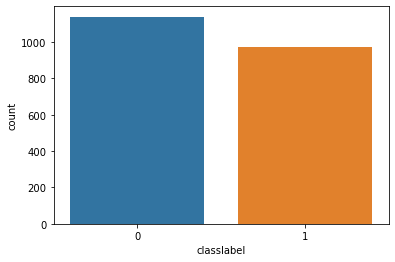

time: 80.7 ms (started: 2021-09-13 19:17:08 +08:00)


In [12]:
sns.countplot(data=dfo, x='classlabel')

The classes are mostly balanced, with 53.95% non-obese and 46% obese.

## One-Hot-Encode the categorical variables

Since there are categorical variables such as `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC` and `MTRANS`, we need to one-hot encode this using `pd.get_dummies` because it will only convert string columns and leave the other columns unchanged.

In [13]:
df = pd.get_dummies(dfo, drop_first=True)
display(df.head(3))

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,classlabel,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Obesity_Normal_Weight,Obesity_Obesity_Type_I,Obesity_Obesity_Type_II,Obesity_Obesity_Type_III,Obesity_Overweight_Level_I,Obesity_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,1,0,0,0,0,0


time: 19 ms (started: 2021-09-13 19:17:08 +08:00)


We will only get the variables of interest. After cleaning the data, our final dataframe for analysis is a 2111 x 24 matrix.

In [14]:
# we will only get the variables of interest

df = df[['classlabel', 'Height', 'Weight', 'Age',
         'Gender_Male', 'FAM_yes', 'SMOKE_yes',
         'FAVC_yes', 'FCVC', 'NCP', 'CAEC_Frequently',
         'CAEC_Sometimes', 'CAEC_no', 'CH2O', 'CALC_Frequently',
         'CALC_Sometimes', 'CALC_no', 'SCC_yes', 'FAF', 'TUE',
         'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
         'MTRANS_Walking']]

# rename family history column to FAM

df

,classlabel,Height,Weight,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1.620000,64.000000,21.000000,0,1,0,0,2.0,3.0,...,0,0,1,0,0.000000,1.000000,0,0,1,0
1,0,1.520000,56.000000,21.000000,0,1,1,0,3.0,3.0,...,0,1,0,1,3.000000,0.000000,0,0,1,0
2,0,1.800000,77.000000,23.000000,1,1,0,0,2.0,3.0,...,1,0,0,0,2.000000,1.000000,0,0,1,0
3,0,1.800000,87.000000,27.000000,1,0,0,0,3.0,3.0,...,1,0,0,0,2.000000,0.000000,0,0,0,1
4,0,1.780000,89.800000,22.000000,1,0,0,0,2.0,1.0,...,0,1,0,0,0.000000,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,1.710730,131.408528,20.976842,0,1,0,1,3.0,3.0,...,0,1,0,0,1.676269,0.906247,0,0,1,0
2107,1,1.748584,133.742943,21.982942,0,1,0,1,3.0,3.0,...,0,1,0,0,1.341390,0.599270,0,0,1,0
2108,1,1.752206,133.689352,22.524036,0,1,0,1,3.0,3.0,...,0,1,0,0,1.414209,0.646288,0,0,1,0
2109,1,1.739450,133.346641,24.361936,0,1,0,1,3.0,3.0,...,0,1,0,0,1.139107,0.586035,0,0,1,0


time: 16.3 ms (started: 2021-09-13 19:17:08 +08:00)


In [15]:
df.isnull().sum()

classlabel                      0
Height                          0
Weight                          0
Age                             0
Gender_Male                     0
FAM_yes                         0
SMOKE_yes                       0
FAVC_yes                        0
FCVC                            0
NCP                             0
CAEC_Frequently                 0
CAEC_Sometimes                  0
CAEC_no                         0
CH2O                            0
CALC_Frequently                 0
CALC_Sometimes                  0
CALC_no                         0
SCC_yes                         0
FAF                             0
TUE                             0
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
dtype: int64

time: 2.64 ms (started: 2021-09-13 19:17:08 +08:00)


# 2: Compute baseline PCC

To get a baseline accuracy, we compute the PCC. The accuracy of the machine learning models sould be greater than 62.89%.

Population per class:      0
0  1139
1   972
Proportion Chance Criterion for binary class: 50.31%
1.25 * Proportion Chance Criterion: 62.89%


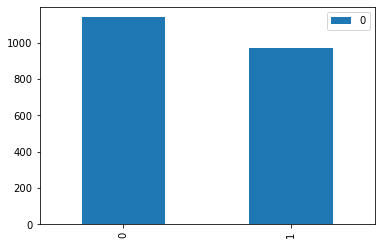

time: 77.5 ms (started: 2021-09-13 19:17:08 +08:00)


In [16]:
import numpy as np
from collections import Counter

target_counts = Counter(df['classlabel'])
df_pcc = pd.DataFrame.from_dict(target_counts, orient='index')
df_pcc.plot(kind='bar')

num=(df_pcc[0]/df_pcc[0].sum())**2

print("Population per class:{}".format(df_pcc))

print("Proportion Chance Criterion for binary class: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

# 3: EDA

In [17]:
dfo

,Gender,Age,Height,Weight,FAM,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,classlabel
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1


time: 14.6 ms (started: 2021-09-13 19:17:08 +08:00)


The following plots shows the different categorical variables with respect to obesity. It can be seen that most obese persons sometimes consume food between meals, use public transportation or private cars, and consume foods that are high in calories. We will see later if these are important features that can predict obesity.

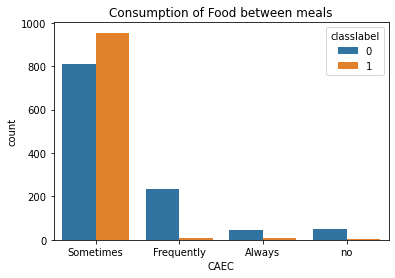

time: 88.8 ms (started: 2021-09-13 19:17:09 +08:00)


In [18]:
sns.countplot(data=dfo, x='CAEC', hue='classlabel')
plt.title('Consumption of Food between meals');

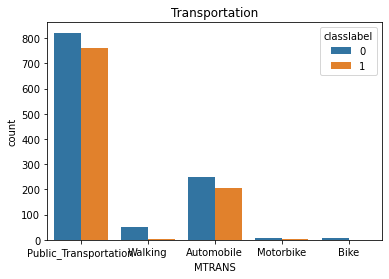

time: 99 ms (started: 2021-09-13 19:17:09 +08:00)


In [19]:
sns.countplot(data=dfo, x='MTRANS', hue='classlabel')
plt.title('Transportation');

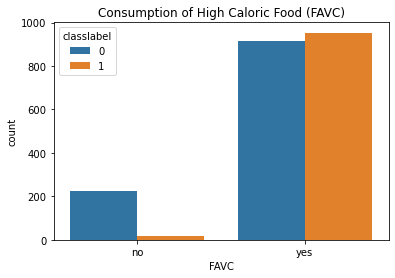

time: 111 ms (started: 2021-09-13 19:17:09 +08:00)


In [20]:
sns.countplot(data=dfo, x='FAVC', hue='classlabel')
plt.title('Consumption of High Caloric Food (FAVC)');

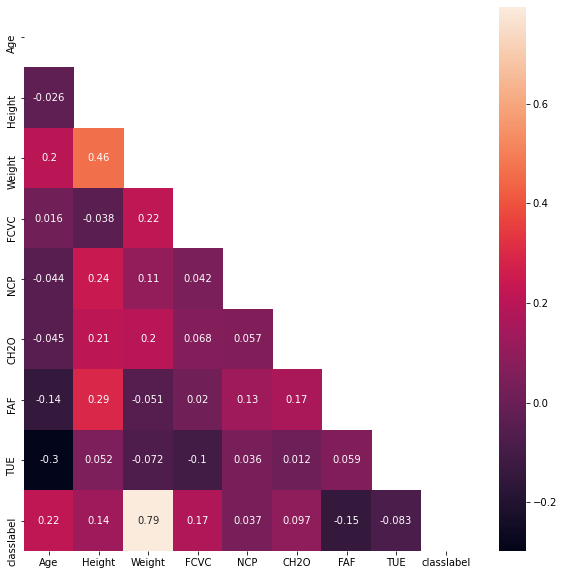

time: 238 ms (started: 2021-09-14 18:35:03 +08:00)


In [95]:
corr = dfo.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True);

It can be seen here that weight is highly correlated with obesity so we have to drop this from the data. The height and weight were also dropped from the data because this is used to compute the BMI, which is the basis of the class label.

## Split the Data into Train and Test

We will follow the train-val-test split. We will split the data, wherein 10% of the data will be the hold-out test, which is data that the model will not see. The full training data will be split into train-val to be able to tune the hyperparameters.

In [22]:
# identify the variables

y = df['classlabel']
X = df.iloc[:,3:]
feature_names = X.columns
feature_names

Index(['Age', 'Gender_Male', 'FAM_yes', 'SMOKE_yes', 'FAVC_yes', 'FCVC', 'NCP',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CH2O',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'SCC_yes', 'FAF', 'TUE',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

time: 2.15 ms (started: 2021-09-13 19:17:11 +08:00)


In [23]:
display(X.head(3))
display(y.unique())

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1,0,0,2.0,3.0,0,1,0,...,0,0,1,0,0.0,1.0,0,0,1,0
1,21.0,0,1,1,0,3.0,3.0,0,1,0,...,0,1,0,1,3.0,0.0,0,0,1,0
2,23.0,1,1,0,0,2.0,3.0,0,1,0,...,1,0,0,0,2.0,1.0,0,0,1,0


array([0, 1])

time: 10.7 ms (started: 2021-09-13 19:17:11 +08:00)


In [24]:
from sklearn.model_selection import train_test_split

X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(X, y,
                                                         test_size=0.10,
                                                         random_state=42)

time: 3.09 ms (started: 2021-09-13 19:17:11 +08:00)


In [25]:
X_fulltrain

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
613,19.376997,0,0,0,0,3.000000,3.000000,1,0,0,...,0,1,0,1,1.295697,0.000000,0,0,1,0
1461,22.088059,1,1,0,1,2.348745,3.000000,0,1,0,...,0,1,0,0,0.544564,0.676880,0,0,1,0
1798,26.844812,1,1,0,1,2.680375,1.089048,0,1,0,...,0,0,1,0,0.181324,1.041677,0,0,1,0
678,19.758286,0,0,0,0,2.880792,3.281391,0,1,0,...,0,1,0,0,1.513029,1.000000,0,0,1,0
819,23.170309,1,1,0,1,2.303367,3.042774,0,1,0,...,0,1,0,0,0.944982,0.366126,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,32.290160,1,1,0,1,2.967300,3.000000,0,1,0,...,0,1,0,0,0.955317,1.339232,0,0,0,0
1095,23.000000,1,1,0,1,2.000000,1.729553,0,1,0,...,0,1,0,0,0.887923,1.011983,0,0,1,0
1130,22.989846,0,1,0,1,2.000000,3.000000,0,1,0,...,0,0,1,0,0.146919,2.000000,0,0,1,0
1294,23.000000,0,1,0,1,2.058687,2.962004,0,1,0,...,0,0,1,0,0.851059,0.630866,0,0,1,0


time: 13.9 ms (started: 2021-09-13 19:17:11 +08:00)


In [26]:
X_fulltrain.isnull().sum()

Age                             0
Gender_Male                     0
FAM_yes                         0
SMOKE_yes                       0
FAVC_yes                        0
FCVC                            0
NCP                             0
CAEC_Frequently                 0
CAEC_Sometimes                  0
CAEC_no                         0
CH2O                            0
CALC_Frequently                 0
CALC_Sometimes                  0
CALC_no                         0
SCC_yes                         0
FAF                             0
TUE                             0
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
dtype: int64

time: 2.19 ms (started: 2021-09-13 19:17:11 +08:00)


## Scale the variables

We can use the MinMaxScaler so that we can do this in one line of code.

### Scale X_fulltrain

In [27]:
print(X_fulltrain.shape)
X_fulltrain.describe().loc[['count','mean','std','min','max']]

(1899, 21)


,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.00000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,...,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.00000,1899.000000,1899.000000,1899.000000,1899.000000
mean,24.364203,0.506582,0.817799,0.022117,0.88415,2.419862,2.681764,0.113217,0.837283,0.024223,...,0.032649,0.666140,0.300685,0.045814,1.012473,0.65539,0.003160,0.005793,0.744602,0.027909
std,6.408105,0.500088,0.386112,0.147102,0.32013,0.537942,0.782171,0.316942,0.369205,0.153782,...,0.177762,0.471715,0.458677,0.209136,0.847217,0.60711,0.056136,0.075908,0.436199,0.164757
min,14.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,61.000000,1.000000,1.000000,1.000000,1.00000,3.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.00000,1.000000,1.000000,1.000000,1.000000


time: 31.4 ms (started: 2021-09-13 19:17:11 +08:00)


In [28]:
X_fulltrain.head(3)
feature_names = X_fulltrain.columns

time: 386 µs (started: 2021-09-13 19:17:11 +08:00)


In [29]:
# scale the variables using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_fulltrain_scale = scaler.fit_transform(X_fulltrain)
X_fulltrain_scale = pd.DataFrame(X_fulltrain_scale, columns=feature_names)

time: 5.1 ms (started: 2021-09-13 19:17:11 +08:00)


In [30]:
X_fulltrain_scale

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.114404,0.0,0.0,0.0,0.0,1.000000,0.666667,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.431899,0.000000,0.0,0.0,1.0,0.0
1,0.172086,1.0,1.0,0.0,1.0,0.674373,0.666667,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.181521,0.338440,0.0,0.0,1.0,0.0
2,0.273294,1.0,1.0,0.0,1.0,0.840188,0.029683,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.060441,0.520838,0.0,0.0,1.0,0.0
3,0.122517,0.0,0.0,0.0,0.0,0.940396,0.760464,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.504343,0.500000,0.0,0.0,1.0,0.0
4,0.195113,1.0,1.0,0.0,1.0,0.651684,0.680925,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.314994,0.183063,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,0.389152,1.0,1.0,0.0,1.0,0.983650,0.666667,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.318439,0.669616,0.0,0.0,0.0,0.0
1895,0.191489,1.0,1.0,0.0,1.0,0.500000,0.243184,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.295974,0.505992,0.0,0.0,1.0,0.0
1896,0.191273,0.0,1.0,0.0,1.0,0.500000,0.666667,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.048973,1.000000,0.0,0.0,1.0,0.0
1897,0.191489,0.0,1.0,0.0,1.0,0.529343,0.654001,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.283686,0.315433,0.0,0.0,1.0,0.0


time: 17.9 ms (started: 2021-09-13 19:17:11 +08:00)


In [31]:
X_fulltrain_scale.describe().loc[['count', 'mean', 'std', 'min', 'max']]

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.00000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,...,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,0.220515,0.506582,0.817799,0.022117,0.88415,0.709931,0.560588,0.113217,0.837283,0.024223,...,0.032649,0.666140,0.300685,0.045814,0.337491,0.327695,0.003160,0.005793,0.744602,0.027909
std,0.136343,0.500088,0.386112,0.147102,0.32013,0.268971,0.260724,0.316942,0.369205,0.153782,...,0.177762,0.471715,0.458677,0.209136,0.282406,0.303555,0.056136,0.075908,0.436199,0.164757
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 29.9 ms (started: 2021-09-13 19:17:11 +08:00)


In [32]:
X_fulltrain_scale.isnull().sum()

Age                             0
Gender_Male                     0
FAM_yes                         0
SMOKE_yes                       0
FAVC_yes                        0
FCVC                            0
NCP                             0
CAEC_Frequently                 0
CAEC_Sometimes                  0
CAEC_no                         0
CH2O                            0
CALC_Frequently                 0
CALC_Sometimes                  0
CALC_no                         0
SCC_yes                         0
FAF                             0
TUE                             0
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
dtype: int64

time: 2.52 ms (started: 2021-09-13 19:17:11 +08:00)


### Scale X_test

In [33]:
display(X_test.head(3))
X_test.describe().loc[['count', 'mean', 'std', 'min', 'max']]

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
544,20.406871,0,1,0,1,2.0,3.891994,1,0,0,...,0,0,1,0,2.870127,2.000000,0,0,1,0
1987,26.000000,0,1,0,1,3.0,3.000000,0,1,0,...,0,1,0,0,0.000000,0.322666,0,0,1,0
420,18.000000,1,1,0,1,3.0,4.000000,0,1,0,...,0,1,0,1,2.000000,0.000000,0,0,0,0


,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000
mean,23.850367,0.500000,0.816038,0.009434,0.882075,2.411705,2.720240,0.127358,0.825472,0.023585,...,0.037736,0.641509,0.320755,0.042453,0.990810,0.680041,0.004717,0.0,0.783019,0.014151
std,5.752811,0.501183,0.388370,0.096898,0.323282,0.497652,0.740866,0.334163,0.380462,0.152111,...,0.191008,0.480692,0.467871,0.202097,0.882076,0.626004,0.068680,0.0,0.413165,0.118393
min,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,40.317787,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.0,1.000000,1.000000


time: 56.8 ms (started: 2021-09-13 19:17:11 +08:00)


In [34]:
# scale the variables using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test_scale = scaler.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=feature_names)

time: 2.25 ms (started: 2021-09-13 19:17:11 +08:00)


In [35]:
display(X_test_scale.head(3))
X_test_scale.describe().loc[['count', 'mean', 'std', 'min', 'max']]

,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.181220,0.0,1.0,0.0,1.0,0.5,0.963998,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.956709,1.000000,0.0,0.0,1.0,0.0
1,0.411222,0.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.161333,0.0,0.0,1.0,0.0
2,0.082244,1.0,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.666667,0.000000,0.0,0.0,0.0,0.0


,Age,Gender_Male,FAM_yes,SMOKE_yes,FAVC_yes,FCVC,NCP,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,SCC_yes,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000
mean,0.322824,0.500000,0.816038,0.009434,0.882075,0.705852,0.573413,0.127358,0.825472,0.023585,...,0.037736,0.641509,0.320755,0.042453,0.330270,0.340020,0.004717,0.0,0.783019,0.014151
std,0.236568,0.501183,0.388370,0.096898,0.323282,0.248826,0.246955,0.334163,0.380462,0.152111,...,0.191008,0.480692,0.467871,0.202097,0.294025,0.313002,0.068680,0.0,0.413165,0.118393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


time: 44 ms (started: 2021-09-13 19:17:11 +08:00)


In [36]:
X_test_scale.isnull().sum()

Age                             0
Gender_Male                     0
FAM_yes                         0
SMOKE_yes                       0
FAVC_yes                        0
FCVC                            0
NCP                             0
CAEC_Frequently                 0
CAEC_Sometimes                  0
CAEC_no                         0
CH2O                            0
CALC_Frequently                 0
CALC_Sometimes                  0
CALC_no                         0
SCC_yes                         0
FAF                             0
TUE                             0
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
dtype: int64

time: 2.84 ms (started: 2021-09-13 19:17:11 +08:00)


In [37]:
# rename the X and y variables for ease

X = X_fulltrain_scale
y = y_fulltrain

#use the unscaled X_test
# X_test = X_test
# y_test = y_test

#use the scaled X_test
X_test = X_test_scale
y_test = y_test

num_trials = 50

time: 267 µs (started: 2021-09-13 19:17:11 +08:00)


# 4A: Initial Trial: Using Auto ML Classifier Models (Code from Class)
Initially, the autoML models made in class were run. However, this was improved later on with a revised AutoML applying GridSearchCV. This is presented for demonstration of completeness of learning.

## KNN Classifier

In [38]:
########## KNN Classifier ###########

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

def train_knn_c(X, y, plot_acc=False):
    start_time = time.time()
    score_train = []
    score_val = []
    k_range = range(1, 10)

    for seed in range(num_trials):
        X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                          test_size=0.25,
                                                          random_state=seed)
        training_accuracy = []  
        val_accuracy = []

        for n_neighbors in k_range:  
            kNN = KNeighborsClassifier(n_neighbors=n_neighbors) 
            kNN.fit(X_train, y_train)
            training_accuracy.append(kNN.score(X_train, y_train))
            val_accuracy.append(kNN.score(X_val, y_val))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)   

    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    model_name = "kNN"
    best_val = np.amax(score_val_means)
    hyperparam = "n_neighbors"
    best_param = np.argmax(score_val_means)+1
    cnt_predictor = "NA"
    
    model_test = KNeighborsClassifier(n_neighbors=best_param).fit(X,y)
    score_test = model_test.score(X_test, y_test)
    
    run_time = (time.time() - start_time)
    
    if plot_acc is True:
        plt.figure(figsize=(5,5))
        plt.plot(k_range, score_train_means, marker='o', label='Train accuracy',
                 color='blue')
        plt.plot(k_range, score_val_means, label='Val accuracy', marker='^',
                 color='red')
        plt.ylabel('Accuracy')
        plt.xlabel('n_neighbors')
        plt.title(f'Training vs Validation Accuracy for {model_name}')
        plt.legend()
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            cnt_predictor, run_time]

time: 789 µs (started: 2021-09-13 19:17:11 +08:00)


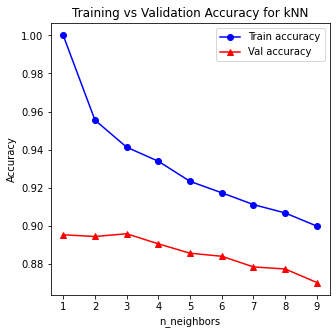

time: 30.1 s (started: 2021-09-13 19:17:11 +08:00)


In [39]:
a = train_knn_c(X, y, plot_acc=True)

## Logistic Regression

In [40]:
####### Logistic Regression ######

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

def train_logistic(X, y, reg, plot_coeff=True, plot_acc=False):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
#     C = [.01, .1]
    start_time = time.time()
    score_train = []
    score_val = []
    weighted_coefs=[]
    
    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            training_accuracy.append(lr.score(X_train, y_train))
            val_accuracy.append(lr.score(X_val, y_val))
            weighted_coefs.append(lr.coef_ ) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    model_name = 'Logistic ({0})'.format(reg)
    best_val = np.amax(score_val_means)
    hyperparam = 'C'
    best_index = np.argmax(score_val_means)
    best_param = C[best_index]
    
    #Plot the weight of the parameters 
    top_predictor = feature_names[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    
    if reg == 'l1':
        model = LogisticRegression(C=best_param, penalty=reg,
                                   solver='liblinear',
                                  max_iter=1000).fit(X_train, y_train)
        score_test = model.score(X_test, y_test)
    if reg == 'l2':
        model = LogisticRegression(C=best_param, penalty=reg,
                                   dual=False,
                                  max_iter=1000).fit(X,y)
        score_test = model.score(X_test, y_test)

    run_time = (time.time() - start_time)
    
    if plot_coeff is True:
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(7,7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(feature_names[np.argsort(abs_mean_coefs)])
        fig.suptitle(f'{model_name} with {reg} Coefficients')
        fig.tight_layout()
        
    if plot_acc is True:
        plt.figure(figsize=(5,5))
        plt.plot(C, score_train_means, marker='o', label='Train accuracy',
                 color='blue')
        plt.plot(C, score_val_means, label='Val accuracy', marker='^',
                 color='red')
        plt.ylabel('Accuracy')
        plt.xlabel('C')
        plt.title(f'Training vs Validation Accuracy for {model_name}')
        plt.legend()
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            top_predictor, run_time]

time: 1.59 ms (started: 2021-09-13 19:17:41 +08:00)


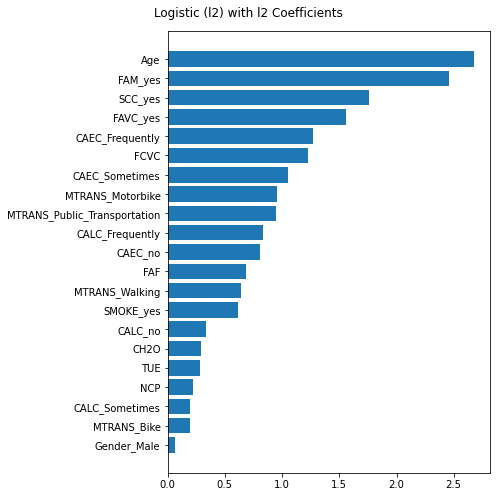

time: 18.3 s (started: 2021-09-14 20:24:28 +08:00)


In [116]:
b = train_logistic(X, y, reg='l2', plot_coeff=True, plot_acc=False)

## Linear SVC

In [42]:
######## Linear SVC #########

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time

def train_SVC(X, y, reg, plot_coeff=True, plot_acc=False):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
#     C = [.01, .1]
    start_time = time.time()
    score_train = []
    score_val = []
    weighted_coefs=[]
    
    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge',
                                dual=False, max_iter=1000).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg,
                                dual=False, max_iter=1000).fit(X_train, y_train)
            
            training_accuracy.append(svc.score(X_train, y_train))
            val_accuracy.append(svc.score(X_val, y_val))
            weighted_coefs.append(svc.coef_ ) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    model_name = 'Linear SVM ({0})'.format(reg)
    best_val = np.amax(score_val_means)
    hyperparam = 'C'
    best_index = np.argmax(score_val_means)
    best_param = C[best_index]
    
    #Plot the weight of the parameters 
    top_predictor = feature_names[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    
    if reg == 'l1':
        model = LinearSVC(C=best_param, penalty=reg, loss='squared_hinge',
                          dual=False, max_iter=1000).fit(X,y)
        score_test = model.score(X_test, y_test)
    if reg == 'l2':
        model = LinearSVC(C=best_param, penalty=reg,
                          dual=False, max_iter=1000).fit(X,y)
        score_test = model.score(X_test, y_test)

    run_time = (time.time() - start_time)
    
    if plot_coeff is True:
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(7,7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(feature_names[np.argsort(abs_mean_coefs)])
        fig.suptitle(f'{model_name} Coefficients')
        fig.tight_layout()
        
    if plot_acc is True:
        plt.figure(figsize=(5,5))
        plt.plot(C, score_train_means, marker='o', label='Train accuracy',
                 color='blue')
        plt.plot(C, score_val_means, label='Val accuracy', marker='^',
                 color='red')
        plt.ylabel('Accuracy')
        plt.xlabel('C')
        plt.title(f'Training vs Validation Accuracy for {model_name}')
        plt.legend()
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            top_predictor, run_time]

time: 4.55 ms (started: 2021-09-13 19:18:00 +08:00)


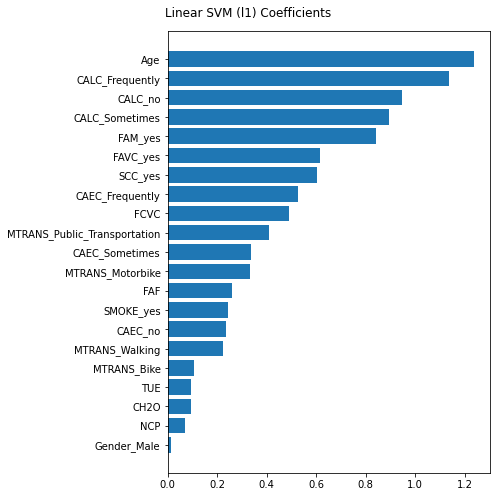

time: 27.7 s (started: 2021-09-13 19:18:00 +08:00)


In [43]:
c = train_SVC(X, y, reg='l1', plot_coeff=True, plot_acc=False)

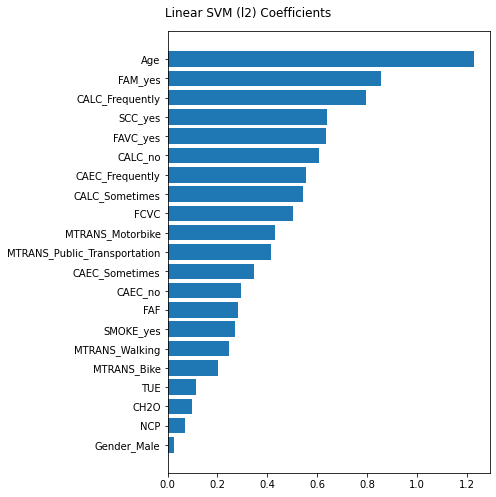

time: 4.72 s (started: 2021-09-13 19:18:27 +08:00)


In [44]:
d = train_SVC(X, y, reg='l2', plot_coeff=True, plot_acc=False)

## Non-linear SVM

In [45]:
########## Nonlinear SVM ###########

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time

def train_SVM(X, y):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
#     C = [.01, .1]
    start_time = time.time()
    score_train = []
    score_val = []
    weighted_coefs=[]
    
    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25,
                                                          random_state=seed)
        for alpha_run in C:
            svm = SVC(kernel='rbf', gamma='auto',
                      C=alpha_run).fit(X_train, y_train)
            
            training_accuracy.append(svm.score(X_train, y_train))
            val_accuracy.append(svm.score(X_val, y_val))
#             weighted_coefs.append(svm.coef_ ) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)
    
#     mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    model_name = 'Nonlinear SVM'
    best_val = np.amax(score_val_means)
    hyperparam = 'C'
    best_index = np.argmax(score_val_means)
    best_param = C[best_index]
    
    #Plot the weight of the parameters 
    top_predictor = 'NA'
#     abs_mean_coefs = np.abs(mean_coefs[0,:])
    
    svm = SVC(kernel='rbf', gamma='auto', C=best_param).fit(X,y)
    score_test = svm.score(X_test, y_test)

    run_time = (time.time() - start_time)
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            top_predictor, run_time]

time: 692 µs (started: 2021-09-13 19:18:32 +08:00)


In [46]:
e = train_SVM(X, y)

time: 4min 23s (started: 2021-09-13 19:18:32 +08:00)


## Random Forest Classifer

In [47]:
######### RANDOM FOREST CLASSIFIER ###########

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

def train_RF_c(X, y, plot_coeff=True, plot_acc=False):
    start_time = time.time()
    max_features_range = [0.2, 0.4, 0.6, 0.8]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        for feature in max_features_range:       
            RF = RandomForestClassifier(max_features=feature).fit(X_train, y_train)
            training_accuracy.append(RF.score(X_train, y_train))
            val_accuracy.append(RF.score(X_val, y_val))
            model_coefs.append(np.abs(RF.feature_importances_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)
    score_train_means = np.mean(score_train, axis=0)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Random Forest Classifier"
    best_val = np.amax(score_val_means)
    hyperparam = "Max features"
    best_param = max_features_range[best_index]

    model_test = RandomForestClassifier(max_features=best_param).fit(X,y)
    score_test = model_test.score(X_test, y_test)

    run_time = (time.time() - start_time)
    
    if plot_acc is True:
        plt.figure(figsize=(5,5))
        plt.plot(max_features_range, score_train_means, marker='o',
                 label='Train accuracy',
                 color='blue')
        plt.plot(max_features_range, score_val_means, label='Val accuracy', marker='^',
                 color='red')
        plt.ylabel('Accuracy')
        plt.xlabel('Max_features')
        plt.title(f'Training vs Validation Accuracy for {model_name}')
        plt.legend()
    
    if plot_coeff is True:
        coefs_count = len(mean_abs_coefs)
        fig, ax = plt.subplots(figsize=(7,7))
        ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
        ax.set_xlabel('Feature importance')
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
        fig.suptitle(f'{model_name} Coefficients')
        fig.tight_layout()
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

time: 1.25 ms (started: 2021-09-13 19:22:56 +08:00)


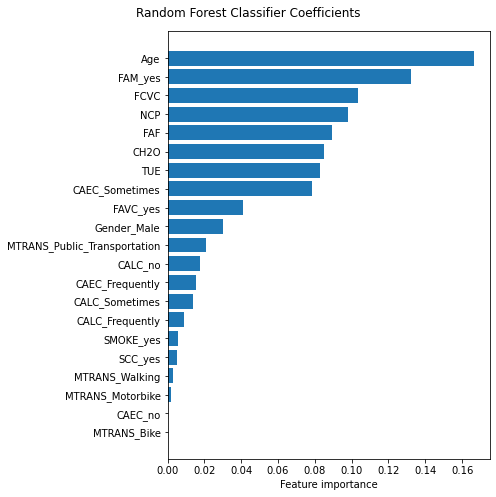

time: 47.6 s (started: 2021-09-14 20:24:46 +08:00)


In [117]:
f = train_RF_c(X, y, plot_coeff=True, plot_acc=False)

## Gradient Boosting Method

In [49]:
############# Gradient Boosting Method ##############

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import time

def train_GBM_c(X, y, plot_coeff=True, plot_acc=False):
    start_time = time.time()
    max_features_range = [0.2, 0.4, 0.6, 0.8]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        for feature in max_features_range:       
            GBM = GradientBoostingClassifier(max_features=feature).fit(X_train, y_train)
            training_accuracy.append(GBM.score(X_train, y_train))
            val_accuracy.append(GBM.score(X_val, y_val))
            model_coefs.append(np.abs(GBM.feature_importances_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)
    score_train_means = np.mean(score_train, axis=0)
    
    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Gradient Boosting Method"
    best_val = np.amax(score_val_means)
    hyperparam = "Max features"
    best_param = max_features_range[best_index]

    model_test = GradientBoostingClassifier(max_features=best_param).fit(X,y)
    score_test = model_test.score(X_test, y_test)
    
    start_time = time.time()
    run_time = (time.time() - start_time)
    
    if plot_acc is True:
        plt.figure(figsize=(5,5))
        plt.plot(max_features_range, score_train_means, marker='o',
                 label='Train accuracy',
                 color='blue')
        plt.plot(max_features_range, score_val_means, label='Val accuracy', marker='^',
                 color='red')
        plt.ylabel('Accuracy')
        plt.xlabel('Max_features')
        plt.title(f'Training vs Validation Accuracy for {model_name}')
        plt.legend()
    
    if plot_coeff is True:
        coefs_count = len(mean_abs_coefs)
        fig, ax = plt.subplots(figsize=(7,7))
        ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
        ax.set_xlabel('Feature importance')
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
        fig.suptitle(f'{model_name} Coefficients')
        fig.tight_layout()
        
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

time: 1.29 ms (started: 2021-09-13 19:23:41 +08:00)


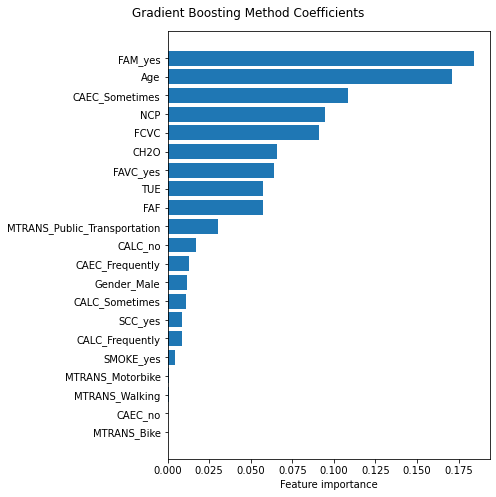

time: 15 s (started: 2021-09-14 20:25:34 +08:00)


In [118]:
g = train_GBM_c(X, y, plot_coeff=True, plot_acc=False)

## SUMMARY of AUTO ML Classifiers

In [52]:
# trial print of the indiv trial runs
cols = ['ML Model', 'Best validation accuracy',
        'Test accuracy', 'Hyperparameter', 'Best parameter value',
        'Top predictor variable', 'Run time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[4] = d
df2.loc[5] = e
df2.loc[6] = f
df2.loc[7] = g

df2

,ML Model,Best validation accuracy,Test accuracy,Hyperparameter,Best parameter value,Top predictor variable,Run time
0,kNN,0.895747,0.919811,n_neighbors,3,NA,29.954355
1,Logistic (l2),0.771158,0.811321,C,0.1,Age,18.505629
2,Linear SVM (l1),0.766147,0.830189,C,0.1,Age,27.546396
4,Linear SVM (l2),0.769095,0.830189,C,0.1,Age,4.576866
5,Nonlinear SVM,0.876126,0.896226,C,5000,NA,263.488649
6,Random Forest Classifier,0.936842,0.915094,Max features,0.4,Age,45.370121
7,Gradient Boosting Method,0.884758,0.849057,Max features,0.8,FAM_yes,0.000000


time: 34.5 ms (started: 2021-09-13 19:24:03 +08:00)


There is still some room to improve these models through better tuning of hyperparameters. Next we take a look at MLTools (for additional sanity check) and then do GridSearchCV on a new autoML pipeline.

# 4B: Secondary Trial: MLTools by Prof Leo

To verify the computations, we also use the MLTools made by Prof Leo. This is not the main model that was used for analysis, just for additional comfort and sanity check.

In [54]:
from mltools import *

time: 262 ms (started: 2021-09-13 19:24:03 +08:00)


## Classifier Models

In [55]:
# Set methods for classifier
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree', 'RF Classifier', 
              'GB Classifier']

time: 190 µs (started: 2021-09-13 19:24:03 +08:00)


In [56]:
# Perform training and testing
ml_models = MLModels.run_classifier(X, y, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=20,
                            n_neighbors=list(range(1, 30)),
                            max_depth=list(range(1, 10)),
                            C=[1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1,
                               1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000],
                            stratify=True,
                            tree_rs=1337,
                            scaling='minmax',
                            test_size=0.20)
res = MLModels.summarize(ml_models, feature_names, show_top=True)

Training and testing: kNN model


  0%|          | 0/580 [00:00<?, ?it/s]

Training and testing: Logistic (L1) model


  0%|          | 0/380 [00:00<?, ?it/s]

Training and testing: Logistic (L2) model


  0%|          | 0/380 [00:00<?, ?it/s]

Training and testing: SVM (L1) model


  0%|          | 0/380 [00:00<?, ?it/s]

Training and testing: SVM (L2) model


  0%|          | 0/380 [00:00<?, ?it/s]

Training and testing: SVM RBF model


  0%|          | 0/380 [00:00<?, ?it/s]

Training and testing: Decision Tree model


  0%|          | 0/180 [00:00<?, ?it/s]

Training and testing: RF Classifier model


  0%|          | 0/180 [00:00<?, ?it/s]

Training and testing: GB Classifier model


  0%|          | 0/180 [00:00<?, ?it/s]

Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,94.15%,90.24%,$n_\text{neighbors} = 3$,0.00 secs,NA
Logistic (L1),77.15%,76.38%,$C = 0.2$,0.04 secs,Age
Logistic (L2),77.18%,76.54%,$C = 0.4$,0.00 secs,Age
SVM (L1),76.98%,76.41%,$C = 0.2$,0.03 secs,Age
SVM (L2),77.42%,76.70%,$C = 0.1$,0.00 secs,Age
SVM RBF,96.51%,90.20%,$C = 300$,0.09 secs,NA
Decision Tree,92.26%,84.97%,Max Depth= 9,0.00 secs,FAM_yes
RF Classifier,96.30%,90.34%,Max Depth= 9,0.10 secs,Age
GB Classifier,100.00%,93.55%,Max Depth= 9,0.75 secs,FAM_yes


time: 5min 10s (started: 2021-09-13 19:24:03 +08:00)


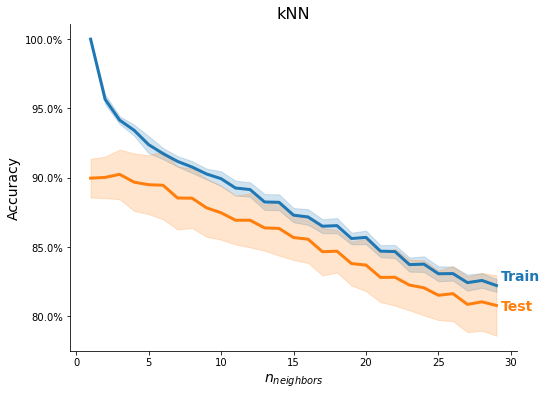

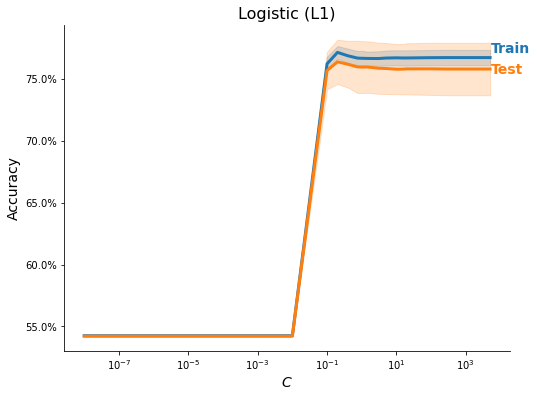

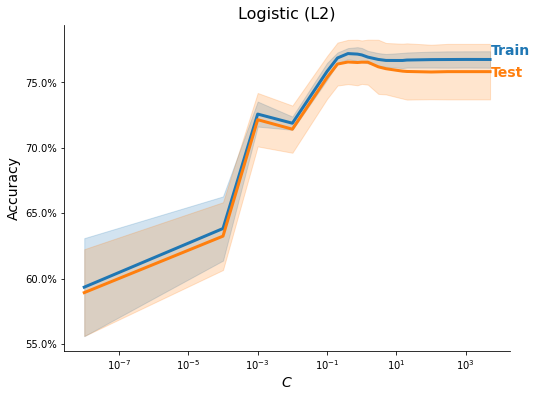

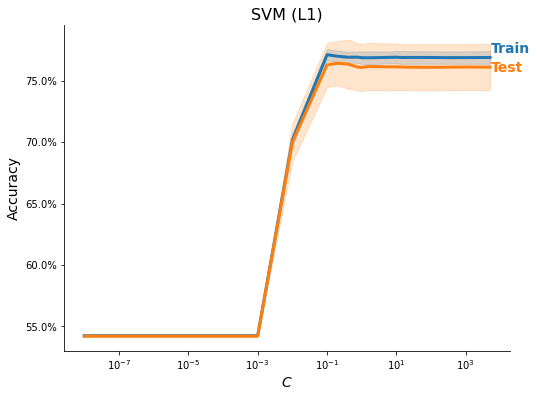

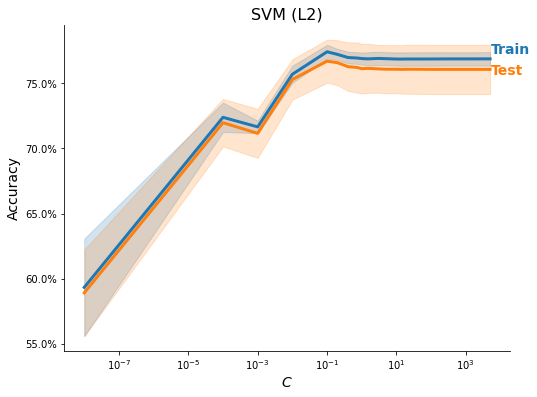

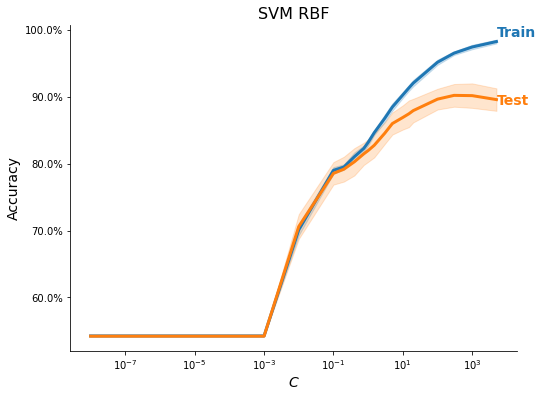

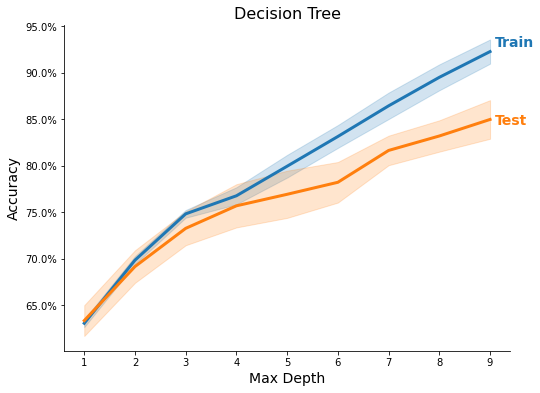

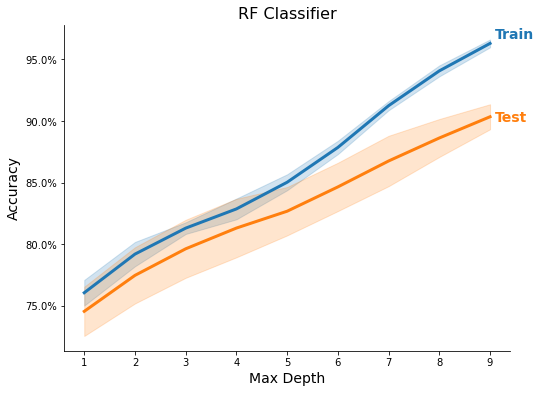

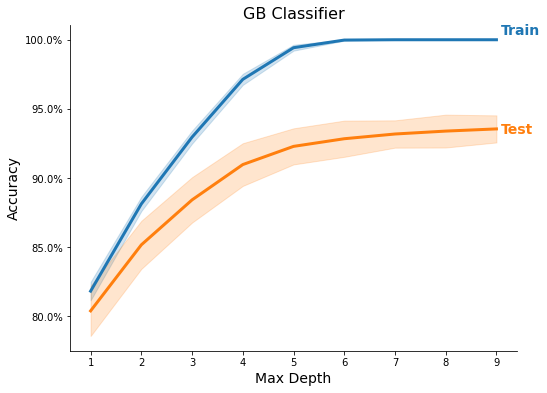

Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,94.15%,90.24%,$n_\text{neighbors} = 3$,0.00 secs,NA
Logistic (L1),77.15%,76.38%,$C = 0.2$,0.04 secs,Age
Logistic (L2),77.18%,76.54%,$C = 0.4$,0.00 secs,Age
SVM (L1),76.98%,76.41%,$C = 0.2$,0.03 secs,Age
SVM (L2),77.42%,76.70%,$C = 0.1$,0.00 secs,Age
SVM RBF,96.51%,90.20%,$C = 300$,0.09 secs,NA
Decision Tree,92.26%,84.97%,Max Depth= 9,0.00 secs,FAM_yes
RF Classifier,96.30%,90.34%,Max Depth= 9,0.10 secs,Age
GB Classifier,100.00%,93.55%,Max Depth= 9,0.75 secs,FAM_yes


time: 1.34 s (started: 2021-09-13 19:29:14 +08:00)


In [57]:
# Generate train-test figures and summary table
res = MLModels.summarize(ml_models, feature_names, show_plot=True, show_top=True)

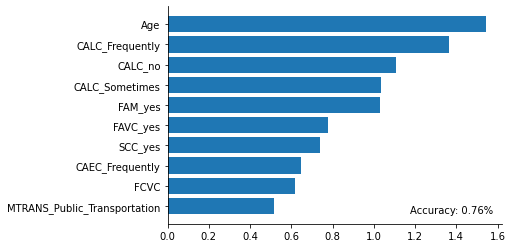

time: 89.4 ms (started: 2021-09-13 19:29:15 +08:00)


In [58]:
ax = ml_models['SVM (L1)'].plot_regularization(feature_names, start_num=8, num_settings=1)

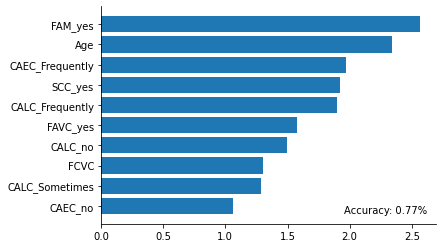

time: 72.4 ms (started: 2021-09-13 19:29:16 +08:00)


In [59]:
ax = ml_models['Logistic (L2)'].plot_regularization(feature_names, start_num=8, num_settings=1)

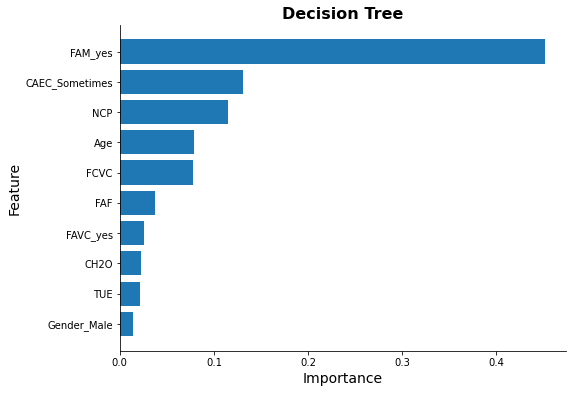

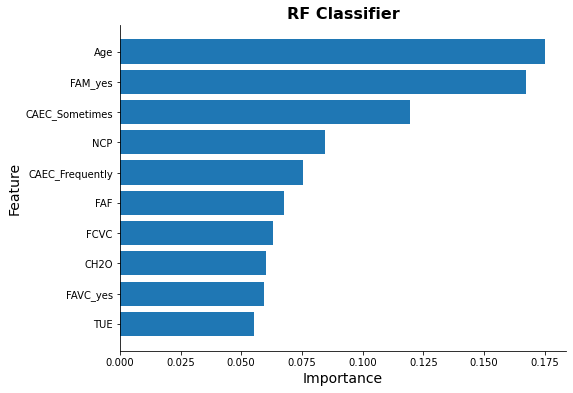

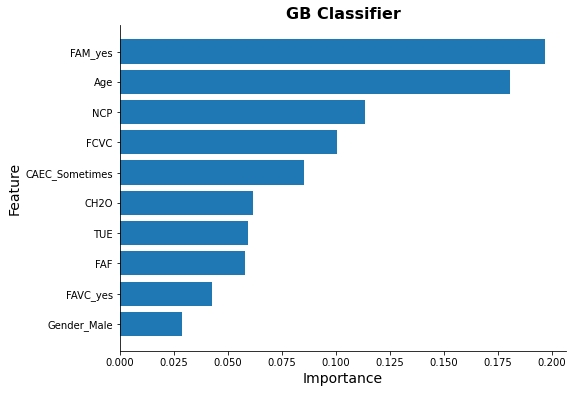

time: 289 ms (started: 2021-09-13 19:29:16 +08:00)


In [60]:
for model_name in use_methods[6:]:
    ax = ml_models[model_name].plot_feature_importance(feature_names)
    ax.set_title(model_name, fontsize=16, weight="bold");

In [61]:
Audio(sound_file, rate = 4410, autoplay=True)

time: 2.52 ms (started: 2021-09-13 19:29:16 +08:00)


From the MLTools it seems the most important features are `age`, `family history`, `consumption of food between meals` and `number of meals`.  The best performing classifier is the `GBM Classifer` which is different from the best performing model using the 7-in-1 AutoML (i.e., Random Forest).

# 4C: Final Trial: Improved AutoML (with GridsearchCV) plus Adaboost and Voting Classifier!

I further improved the AutoML in class (as inspired by Prof Basti to make my own `grimoire!`) by incorporating grid search and cross validation. The GridSearchCV was most useful for the ensemble models because there were more than one parameter that needed to be tuned, and this reduced the for loops that had to be used. 

Additional new models not discussed in class, such as `Adaboost` and `Voting Classifier` was also explored. These are the models that we will be evaluating.

In [62]:
# rename the X and y variables for ease

X = X_fulltrain_scale
y = y_fulltrain

#use the unscaled X_test
# X_test = X_test
# y_test = y_test

#use the scaled X_test
X_test = X_test_scale
y_test = y_test

time: 210 µs (started: 2021-09-13 19:29:16 +08:00)


## KNN

In [63]:
############## KNN ###############

def KNN_gcv():
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier() 
    
    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'n_neighbors':range(0,60,1)}

    grid_model = GridSearchCV(estimator=KNN,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_n = best_params['n_neighbors']

    # Use the best settings 
    KNN = KNeighborsClassifier(n_neighbors=best_n).fit(X_train,y_train)
    train_acc = KNN.score(X_train, y_train)
    val_acc = KNN.score(X_val, y_val)
    test_acc = KNN.score(X_test, y_test)
    
    model_name = "KNN Classifier"
    top_coeff = 'NA'


    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params, top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 545 µs (started: 2021-09-13 19:29:16 +08:00)


In [64]:
a = KNN_gcv()

train accuracy: 1.0 val acc: 0.9070175438596492 test acc: 0.9245283018867925 {'n_neighbors': 1} NA
time: 3.46 s (started: 2021-09-13 19:29:16 +08:00)


The optimal n_neighbors is 1 with an accuracy of 92.45%. There are no feature importances here so the interpretability of this model is a disadvantage for this study.

## Logistic Regression

In [65]:
############## LOGISTIC REGRESSION ###############

def logistic_gcv(plot_coeff=False):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'penalty':['l1','l2', 'elasticnet'],
                  'C':[1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5,
                       10, 15,  20, 100, 300, 1000, 5000]}

    grid_model = GridSearchCV(estimator=LR,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_penalty = best_params['penalty']
    best_C = best_params['C']

    # Use the best settings 
    LR = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_train,y_train)
    train_acc = LR.score(X_train, y_train)
    val_acc = LR.score(X_val, y_val)
    test_acc = LR.score(X_test, y_test)

    # get the top features
    coefs = pd.Series(index=X.columns,data=abs(LR.coef_[0]))
    coefs = coefs.sort_values()
    top_coeff = coefs.index[-1]

    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(x=coefs.index,y=coefs.values)
        plt.xticks(rotation=90);
    
    model_name = "Logistic Regression"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 730 µs (started: 2021-09-13 19:29:19 +08:00)


train accuracy: 0.764484574868322 val acc: 0.7631578947368421 test acc: 0.8301886792452831 {'C': 0.75, 'penalty': 'l2'} FAM_yes


['Logistic Regression',
 0.764484574868322,
 0.7631578947368421,
 0.8301886792452831,
 {'C': 0.75, 'penalty': 'l2'},
 'FAM_yes',
 1.7579319477081299]

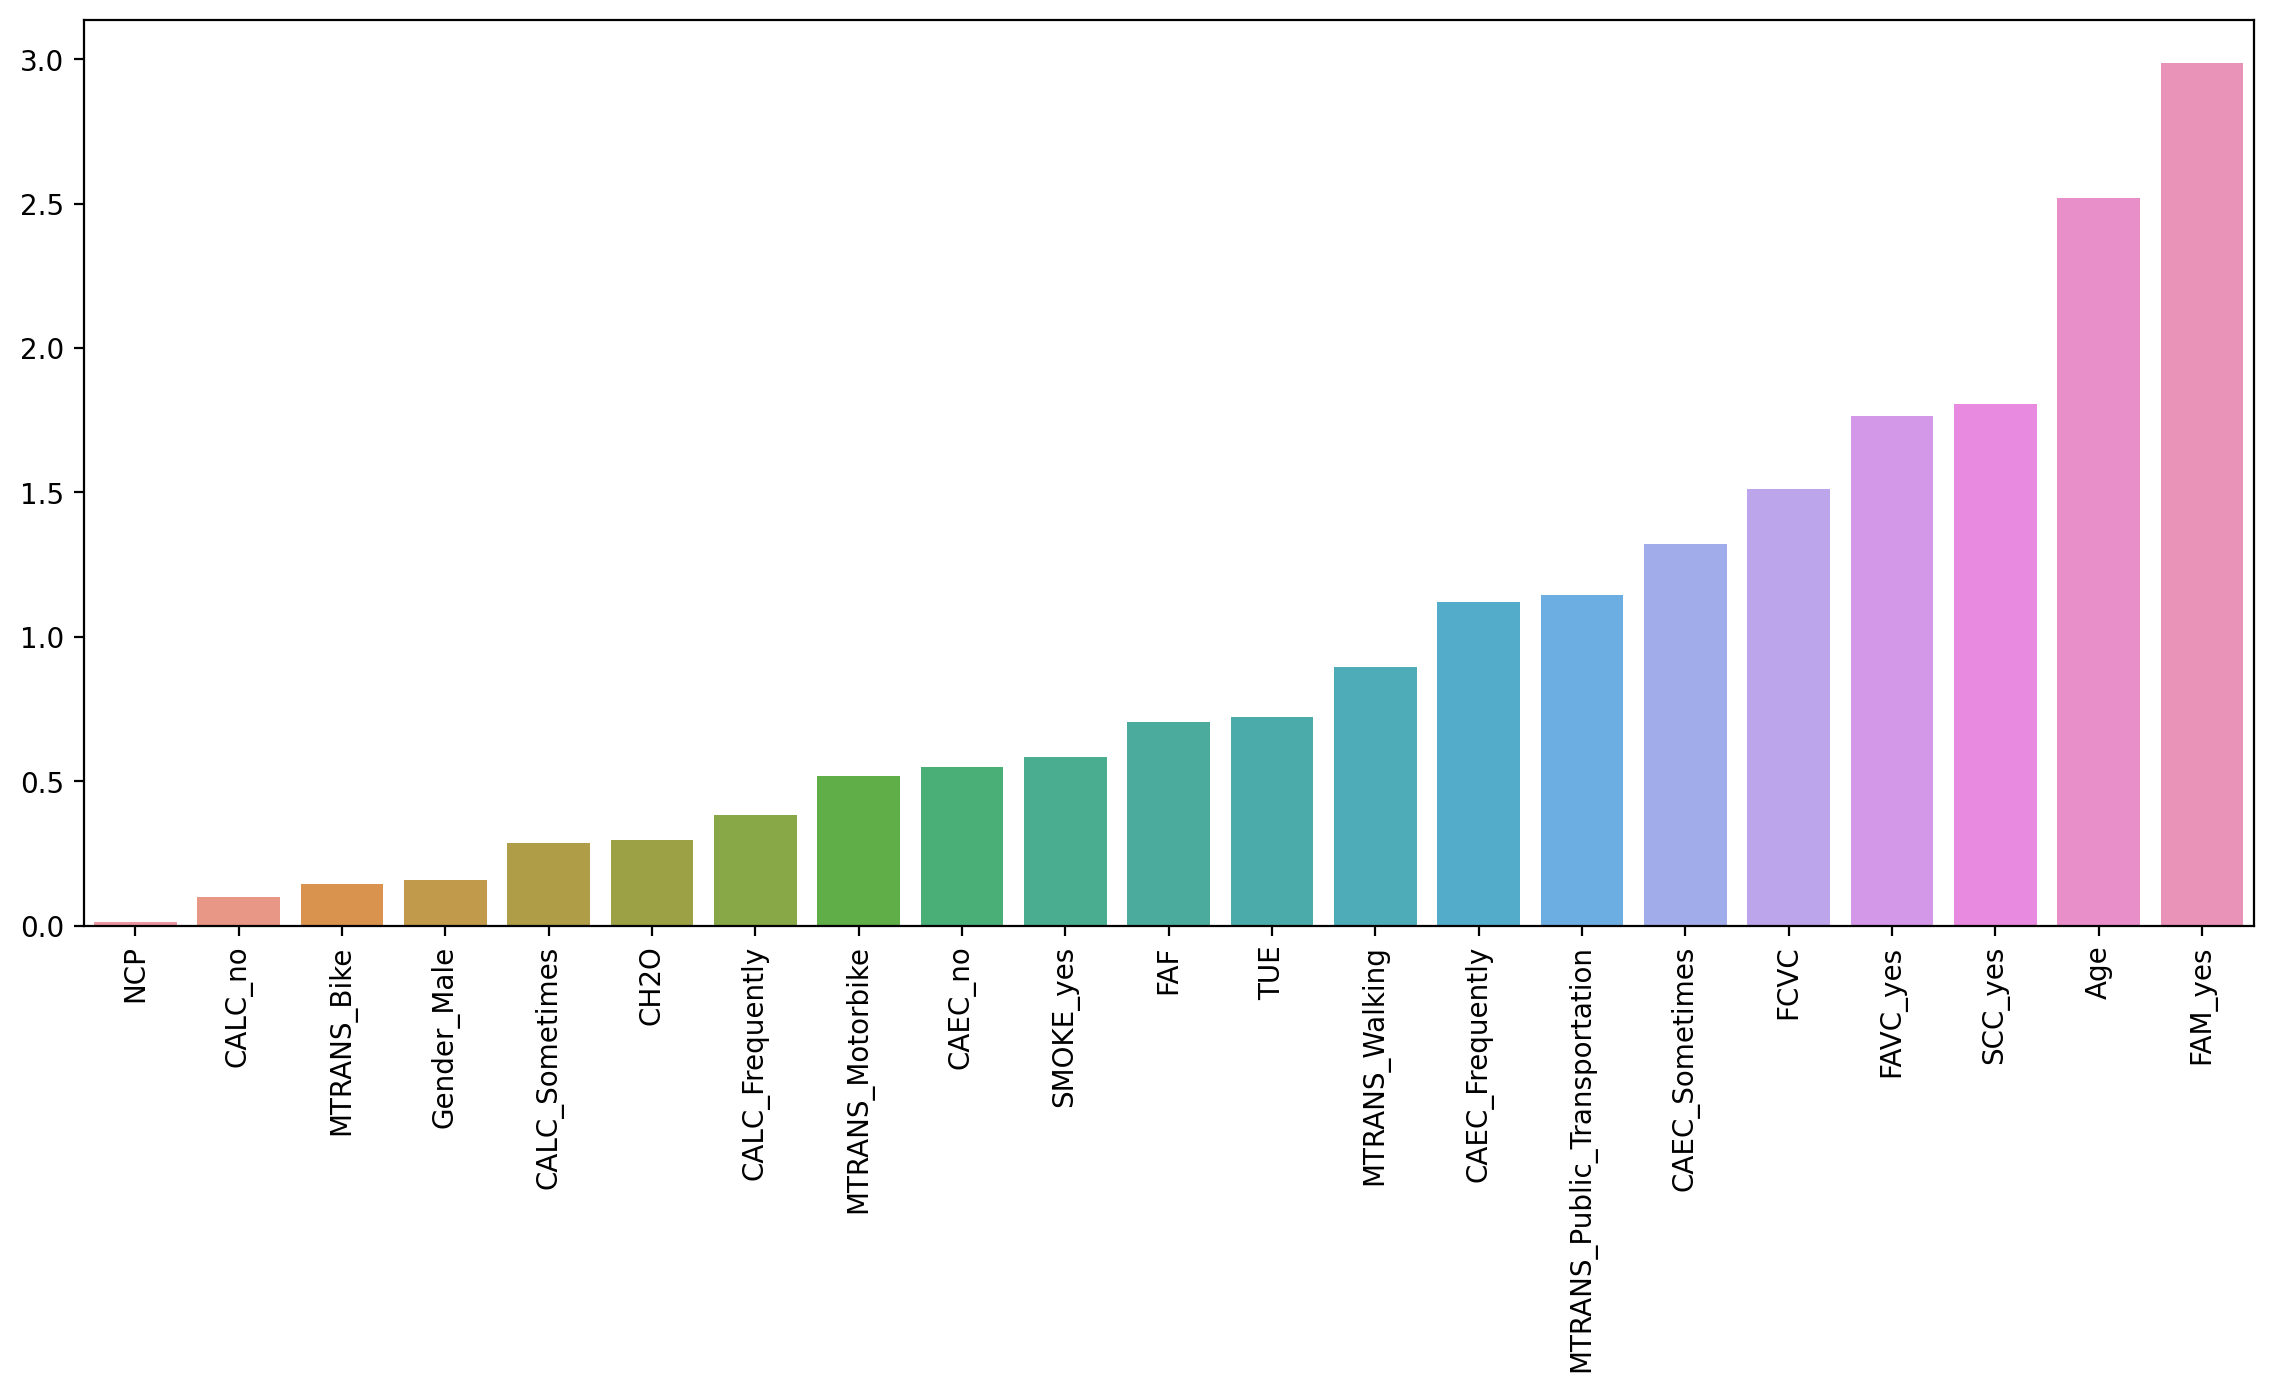

time: 1.97 s (started: 2021-09-13 19:29:19 +08:00)


In [66]:
b = logistic_gcv(plot_coeff=True)
b

The Logistic Regression with L2 regularization's most important features are `family history of obesity`, `age`, and `calorie counting monitoring`.

## Support Vector Classifier

In [67]:
############## Linear SVC ###############

def SVC_gcv(plot_coeff=False):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.svm import LinearSVC
    SVC = LinearSVC()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'C':[1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3,
                       5, 10, 15,  20, 100, 300, 1000, 5000],
                  'penalty':['l1', 'l2']}

    grid_model = GridSearchCV(estimator=SVC,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_C = best_params['C']
    best_penalty = best_params['penalty']

    # Use the best settings 
    SVC = LinearSVC(C=best_C, penalty=best_penalty,
                    max_iter=1000).fit(X_train,y_train)
    train_acc = SVC.score(X_train, y_train)
    val_acc = SVC.score(X_val, y_val)
    test_acc = SVC.score(X_test, y_test)

    # get the top features
    coefs = pd.Series(index=X.columns,data=abs(SVC.coef_[0]))
    coefs = coefs.sort_values()
    top_coeff = coefs.index[-1]
    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(x=coefs.index,y=coefs.values)
        plt.xticks(rotation=90);
    
    model_name = "Linear SVM Classifier"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 687 µs (started: 2021-09-13 19:29:21 +08:00)


train accuracy: 0.7667419112114372 val acc: 0.7701754385964912 test acc: 0.8207547169811321 {'C': 0.1, 'penalty': 'l2'} FAM_yes


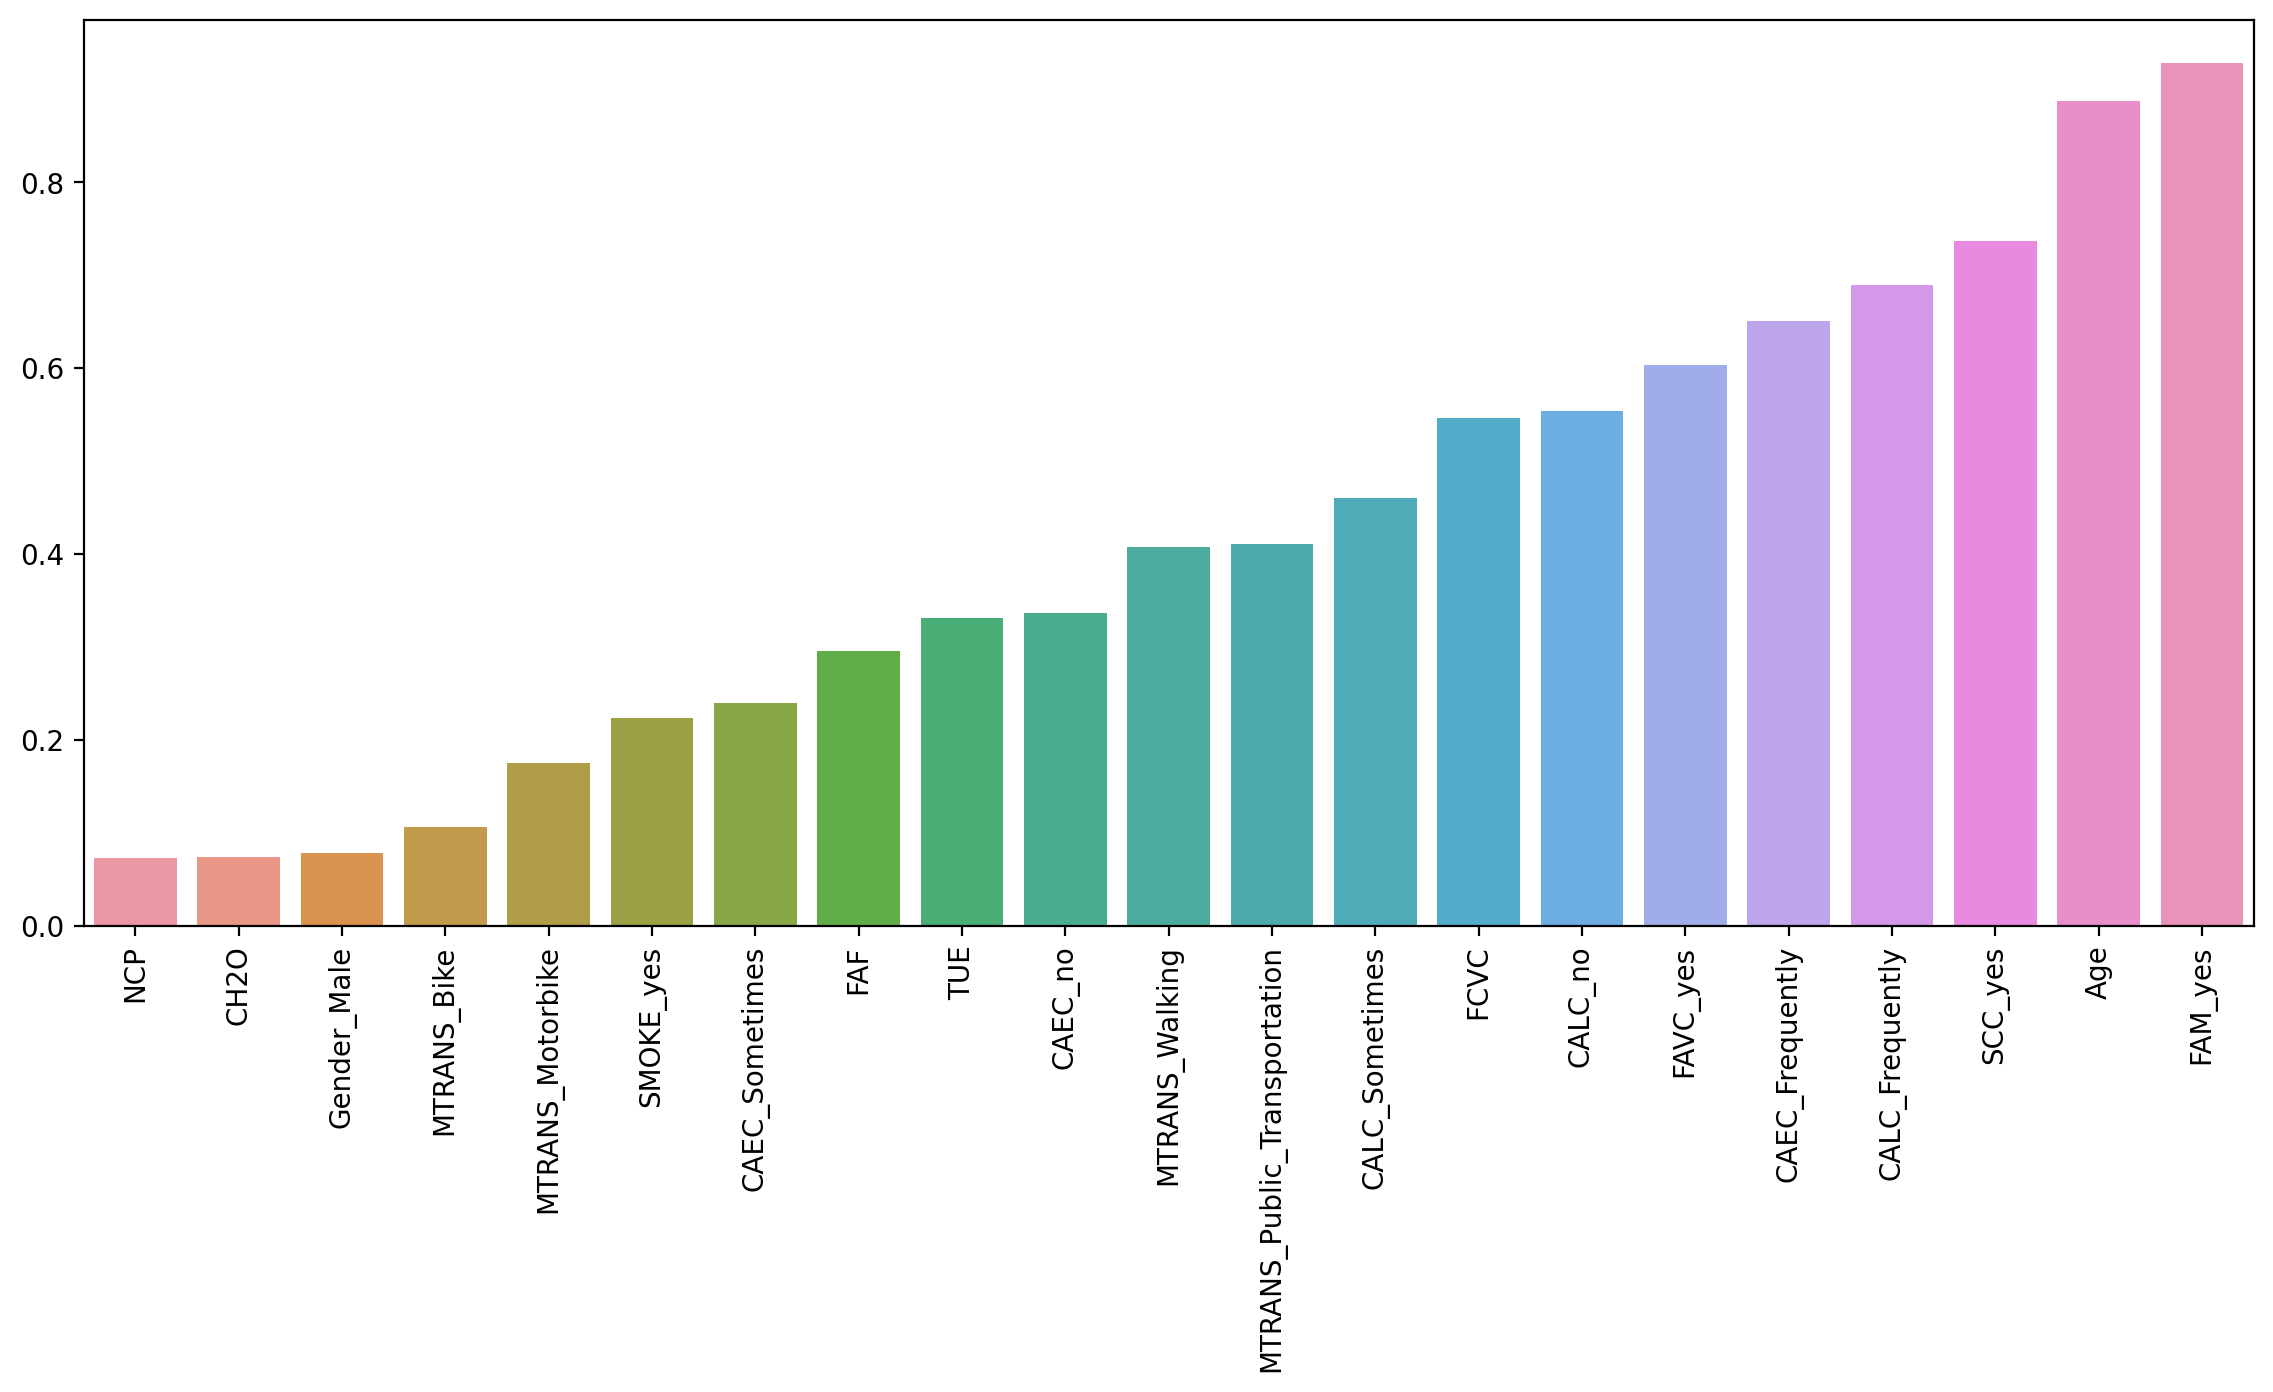

time: 2.44 s (started: 2021-09-13 19:29:21 +08:00)


In [68]:
c = SVC_gcv(plot_coeff=True)

Similar to logistic regression, Linear SVM's most important features are `family history of obesity`, `age`, and `calorie counting monitoring`.

## Nonlinear SVM

In [69]:
############## Nonlinear SVM ###############

def SVM_gcv():
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.svm import SVC
    SVM = SVC()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'C':[1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3,
                       5, 10, 15,  20, 100, 300, 1000, 5000],
                  'kernel':['poly', 'rbf'],
                 'gamma':['scale', 'auto']}

    grid_model = GridSearchCV(estimator=SVM,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_C = best_params['C']
    best_kernel = best_params['kernel']
    best_gamma = best_params['gamma']

    # Use the best settings 
    SVM = SVC(kernel=best_kernel, gamma=best_gamma,
                      C=best_C).fit(X_train, y_train)
    train_acc = SVM.score(X_train, y_train)
    val_acc = SVM.score(X_val, y_val)
    test_acc = SVM.score(X_test, y_test)
    
    model_name = "Nonlinear SVM Classifier"
    top_coeff = 'NA'

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 552 µs (started: 2021-09-13 19:29:24 +08:00)


In [70]:
d = SVM_gcv()

train accuracy: 0.9834462001504891 val acc: 0.8859649122807017 test acc: 0.9009433962264151 {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'} NA
time: 27.5 s (started: 2021-09-13 19:29:24 +08:00)


Nonlinear SVM performs better than the logistic regression and the linear SVM, but again interpretability is a problem and we cannot get feature importances for this model. We can, however, use this for classifying obesity given data with 0.90 accuracy.

## GBM

In [71]:
############## GBM ###############

def GBM_gcv(plot_coeff=False):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.ensemble import GradientBoostingClassifier
    GBM = GradientBoostingClassifier()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'max_depth':[0.1,1,5,10,50,100],
                  'learning_rate':[.1, .5, .7, .9, .95, .99, 1]}

    grid_model = GridSearchCV(estimator=GBM,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_lr = best_params['learning_rate']
    best_maxdepth = best_params['max_depth']

    # Use the best settings 
    GBM = GradientBoostingClassifier(learning_rate=best_lr, max_depth=best_maxdepth,
                                     max_features='sqrt').fit(X_train,y_train)
    train_acc = GBM.score(X_train, y_train)
    val_acc = GBM.score(X_val, y_val)
    test_acc = GBM.score(X_test, y_test)

    # get the top features
    feat_import = grid_model.best_estimator_.feature_importances_
    imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
    imp_feats.sort_values("Importance",ascending=False)
    top_coeff = imp_feats.index.values[0]
    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(data=imp_feats.sort_values('Importance'),
                    x=imp_feats.sort_values('Importance').index,y='Importance')
        plt.xticks(rotation=90);
    
    model_name = "GBM Classifier"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 666 µs (started: 2021-09-13 19:29:51 +08:00)


train accuracy: 1.0 val acc: 0.9473684210526315 test acc: 0.9056603773584906 {'learning_rate': 0.5, 'max_depth': 10} Age


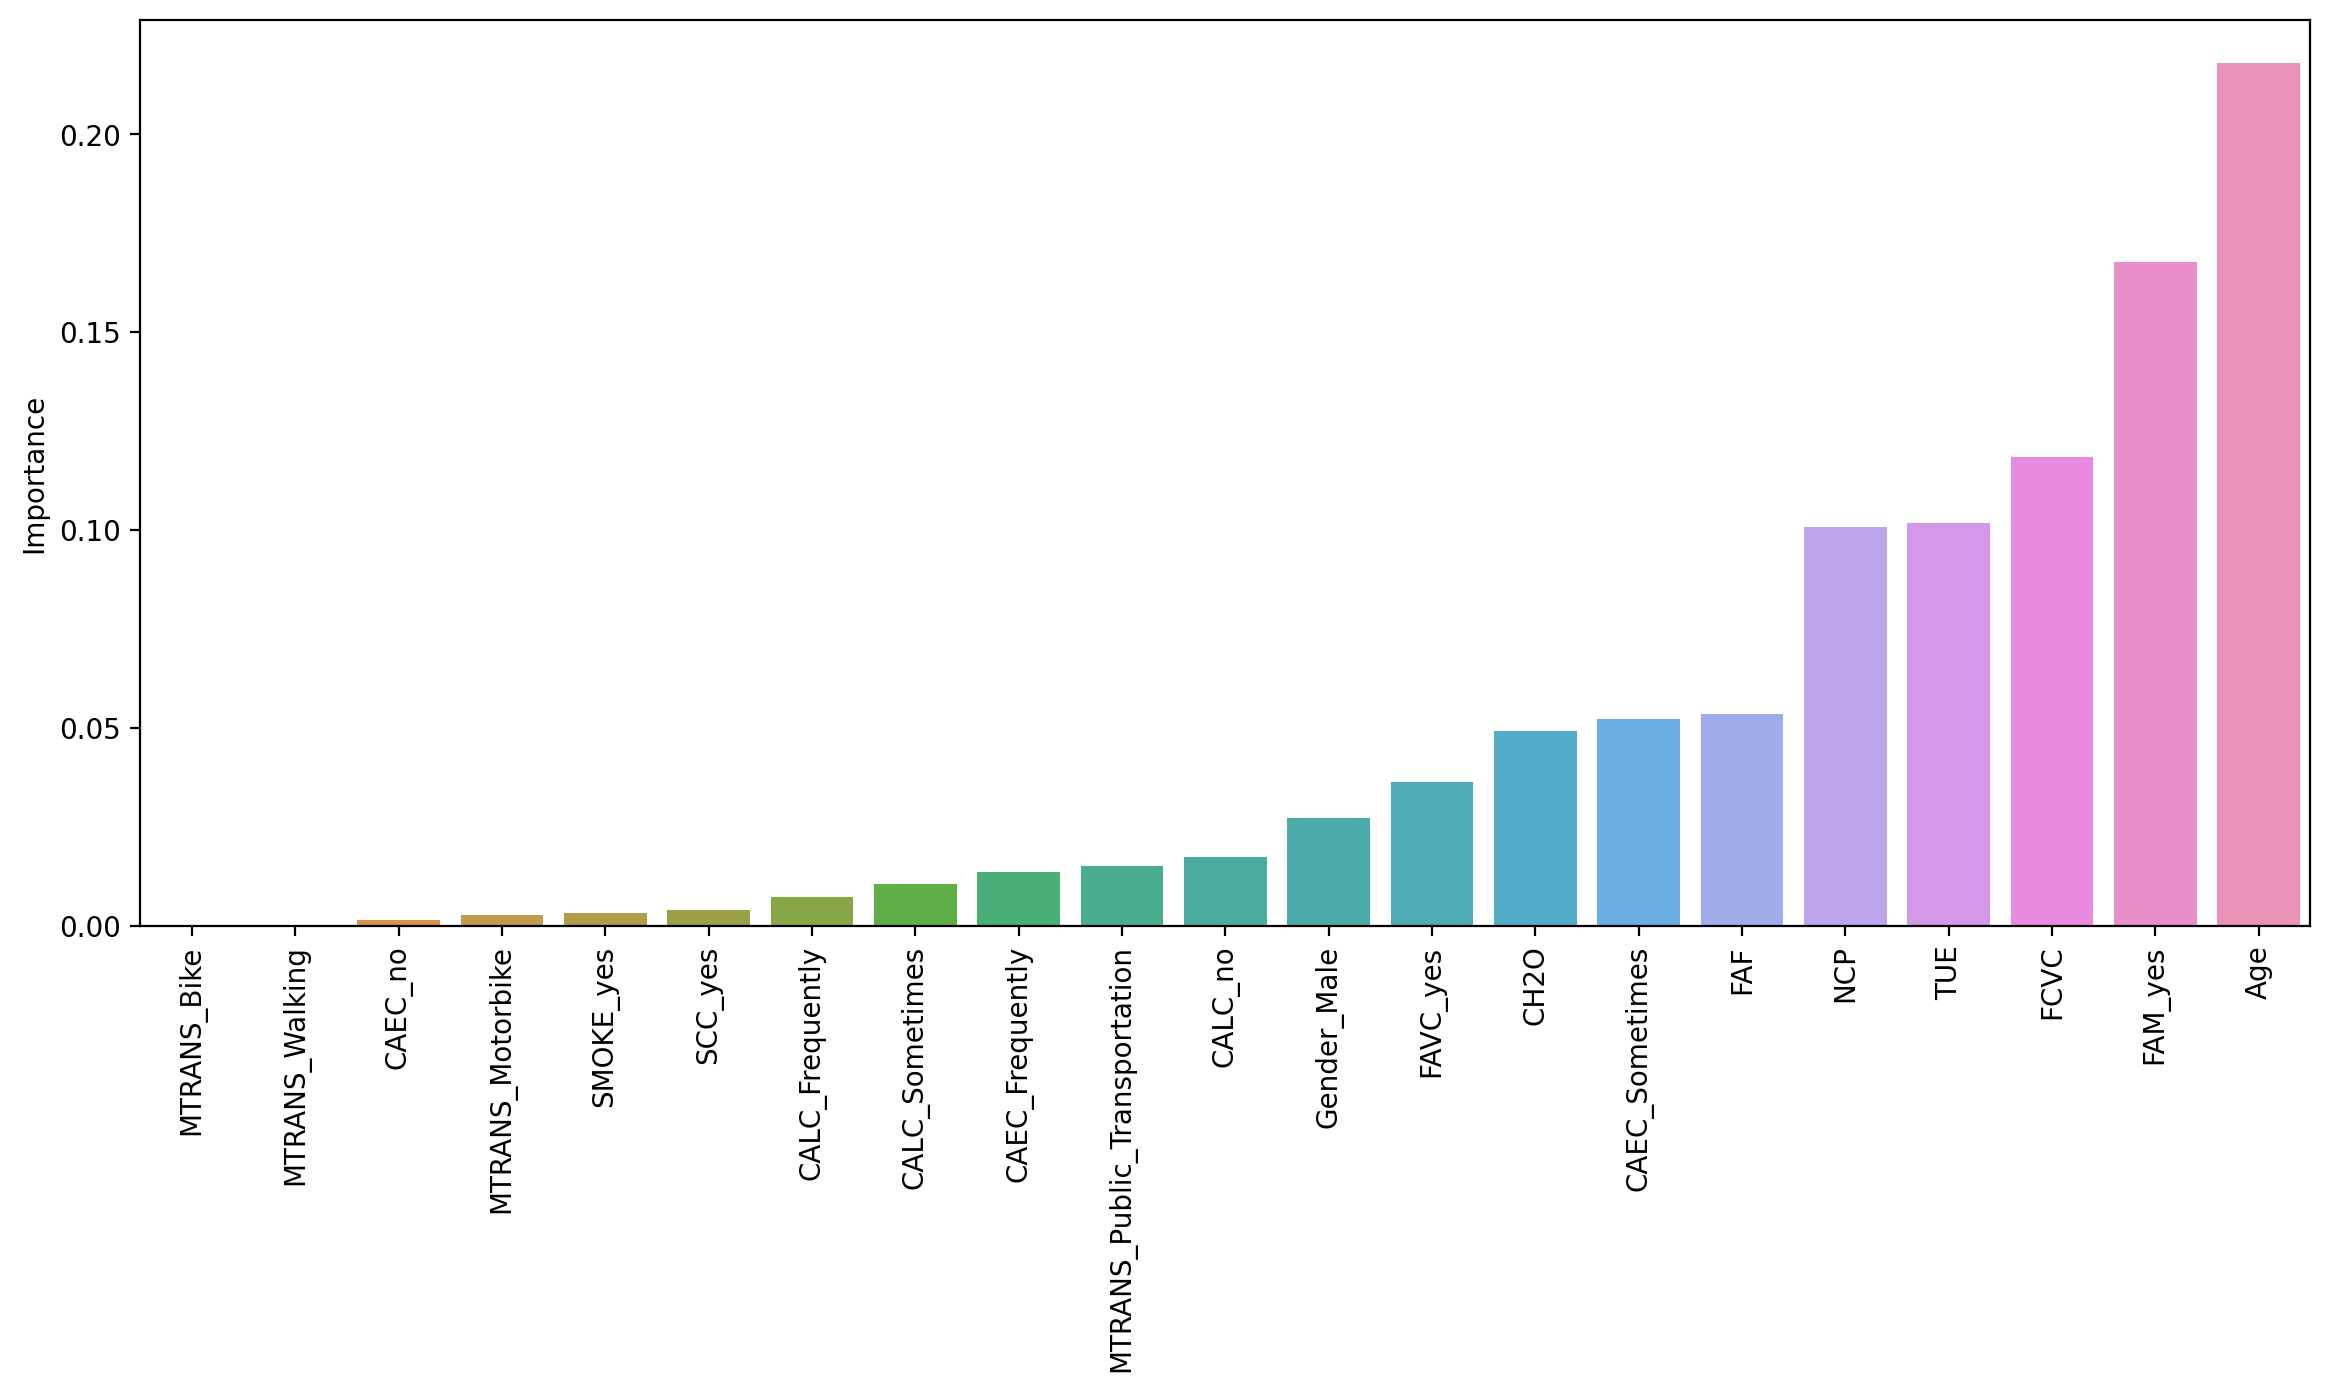

time: 1min 19s (started: 2021-09-13 19:29:51 +08:00)


In [72]:
e = GBM_gcv(True)

The GBM's feature importances are `age`, `family history of obesity` and `regular consumption of vegetables` (inverse relationship). This model shows high accuracy at 90.56% accuracy.

## Random Forest

In [73]:
############## RANDOM FOREST ###############

def RF_gcv(plot_coeff=False, max_features='sqrt'):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.ensemble import RandomForestClassifier
    RF = RandomForestClassifier()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'max_depth':[1, 3, 5, 10],
                  'n_estimators':[1, 3, 5, 10, 20, 50, 100]}

    grid_model = GridSearchCV(estimator=RF,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_est = best_params['n_estimators']
    best_maxdepth = best_params['max_depth']

    # Use the best settings 
    RF = RandomForestClassifier(max_depth=best_maxdepth, n_estimators=best_est,
                                     max_features=max_features).fit(X_train,y_train)
    train_acc = RF.score(X_train, y_train)
    val_acc = RF.score(X_val, y_val)
    test_acc = RF.score(X_test, y_test)

    # get the top features
    feat_import = grid_model.best_estimator_.feature_importances_
    imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
    imp_feats.sort_values("Importance",ascending=False)
    top_coeff = imp_feats.index.values[0]
    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(data=imp_feats.sort_values('Importance'),
                    x=imp_feats.sort_values('Importance').index,y='Importance')
        plt.xticks(rotation=90);
    
    model_name = "Random Forest Classifier"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 921 µs (started: 2021-09-13 19:31:11 +08:00)


train accuracy: 0.9872084273890143 val acc: 0.9368421052631579 test acc: 0.9009433962264151 {'max_depth': 10, 'n_estimators': 100} Age


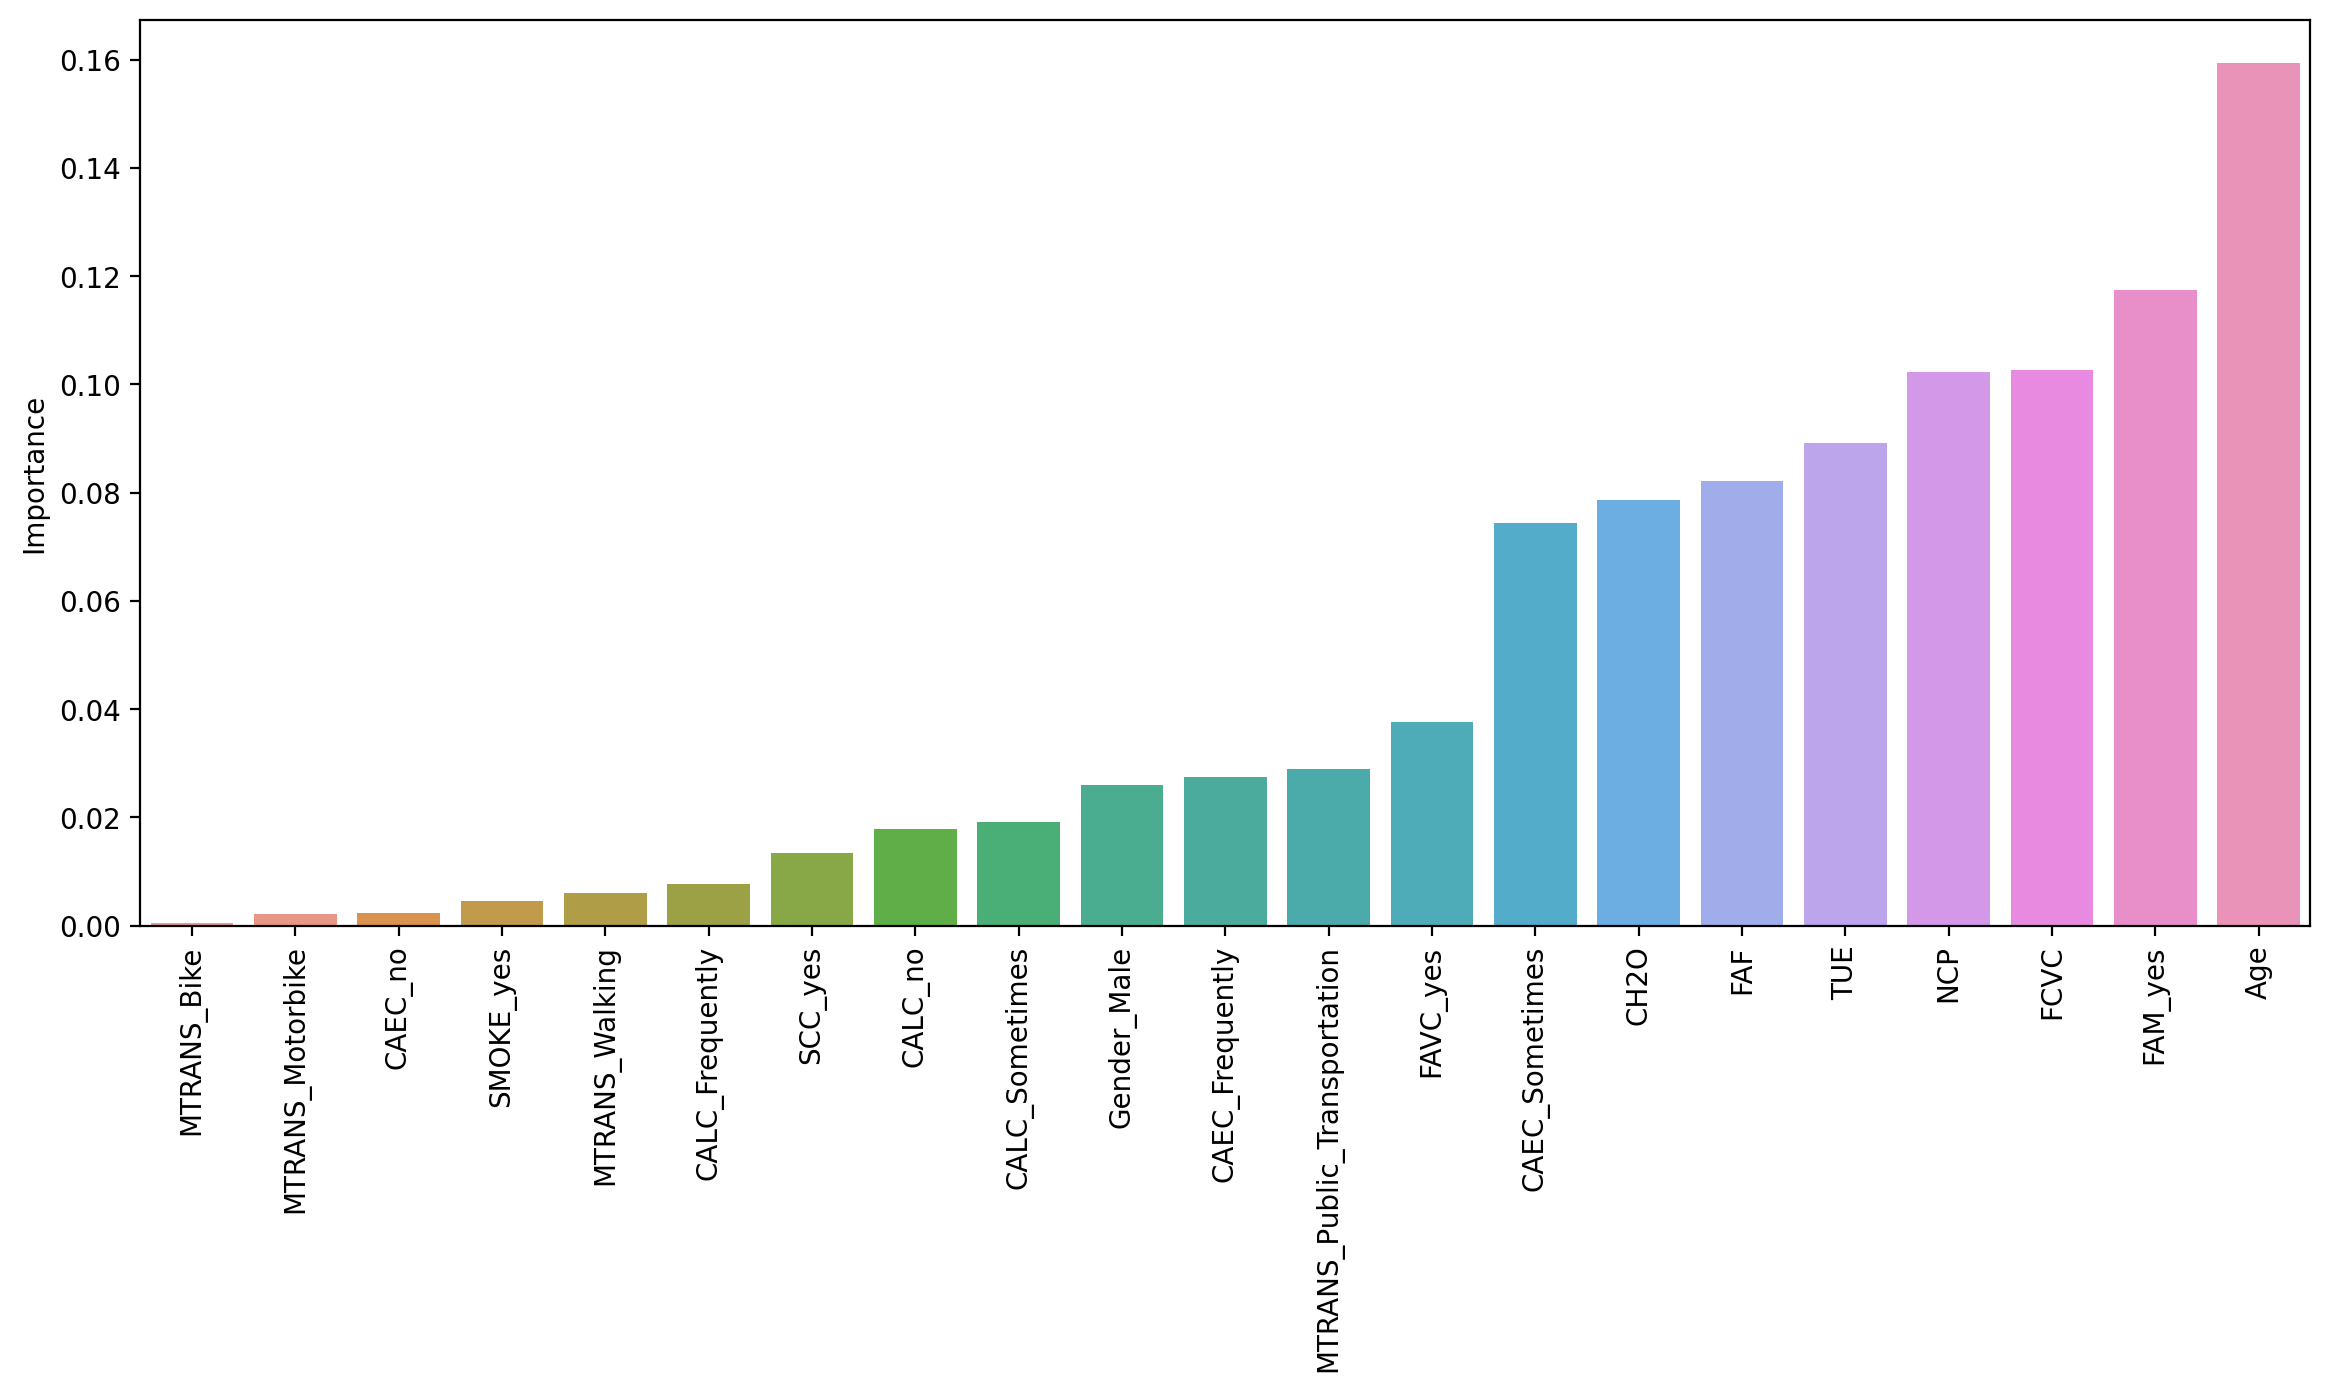

time: 4.38 s (started: 2021-09-13 19:31:11 +08:00)


In [74]:
f = RF_gcv(True)

For Random Forest, the most important features are `age`, `family history of obesity` and `consumption of fruits and vegetables` (inverse relationship), similar to the result of GBM. However, the accuracy is slightly lower at 90.90%.

## Adaboost

In [75]:
############## ADABOOST ###############

def ADB_gcv(plot_coeff=False):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.ensemble import AdaBoostClassifier    
    ADB = AdaBoostClassifier()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'n_estimators':[1, 3, 5, 10, 20, 40, 50, 80, 100],
                 'learning_rate':[.1, .5, .7, .9, .95, .99, 1]}

    grid_model = GridSearchCV(estimator=ADB,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_est = best_params['n_estimators']
    best_lr = best_params['learning_rate']

    # Use the best settings 
    ADB = AdaBoostClassifier(n_estimators=best_est,
                                learning_rate=best_lr).fit(X_train,y_train)
    train_acc = ADB.score(X_train, y_train)
    val_acc = ADB.score(X_val, y_val)
    test_acc = ADB.score(X_test, y_test)

    # get the top features
    feat_import = grid_model.best_estimator_.feature_importances_
    imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
    imp_feats.sort_values("Importance",ascending=False)
    top_coeff = imp_feats.index.values[0]
    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(data=imp_feats.sort_values('Importance'),
                    x=imp_feats.sort_values('Importance').index,y='Importance')
        plt.xticks(rotation=90);
    
    model_name = "AdaBoost Classifier"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 649 µs (started: 2021-09-13 19:31:15 +08:00)


train accuracy: 0.8570353649360422 val acc: 0.8333333333333334 test acc: 0.7971698113207547 {'learning_rate': 0.9, 'n_estimators': 100} Age


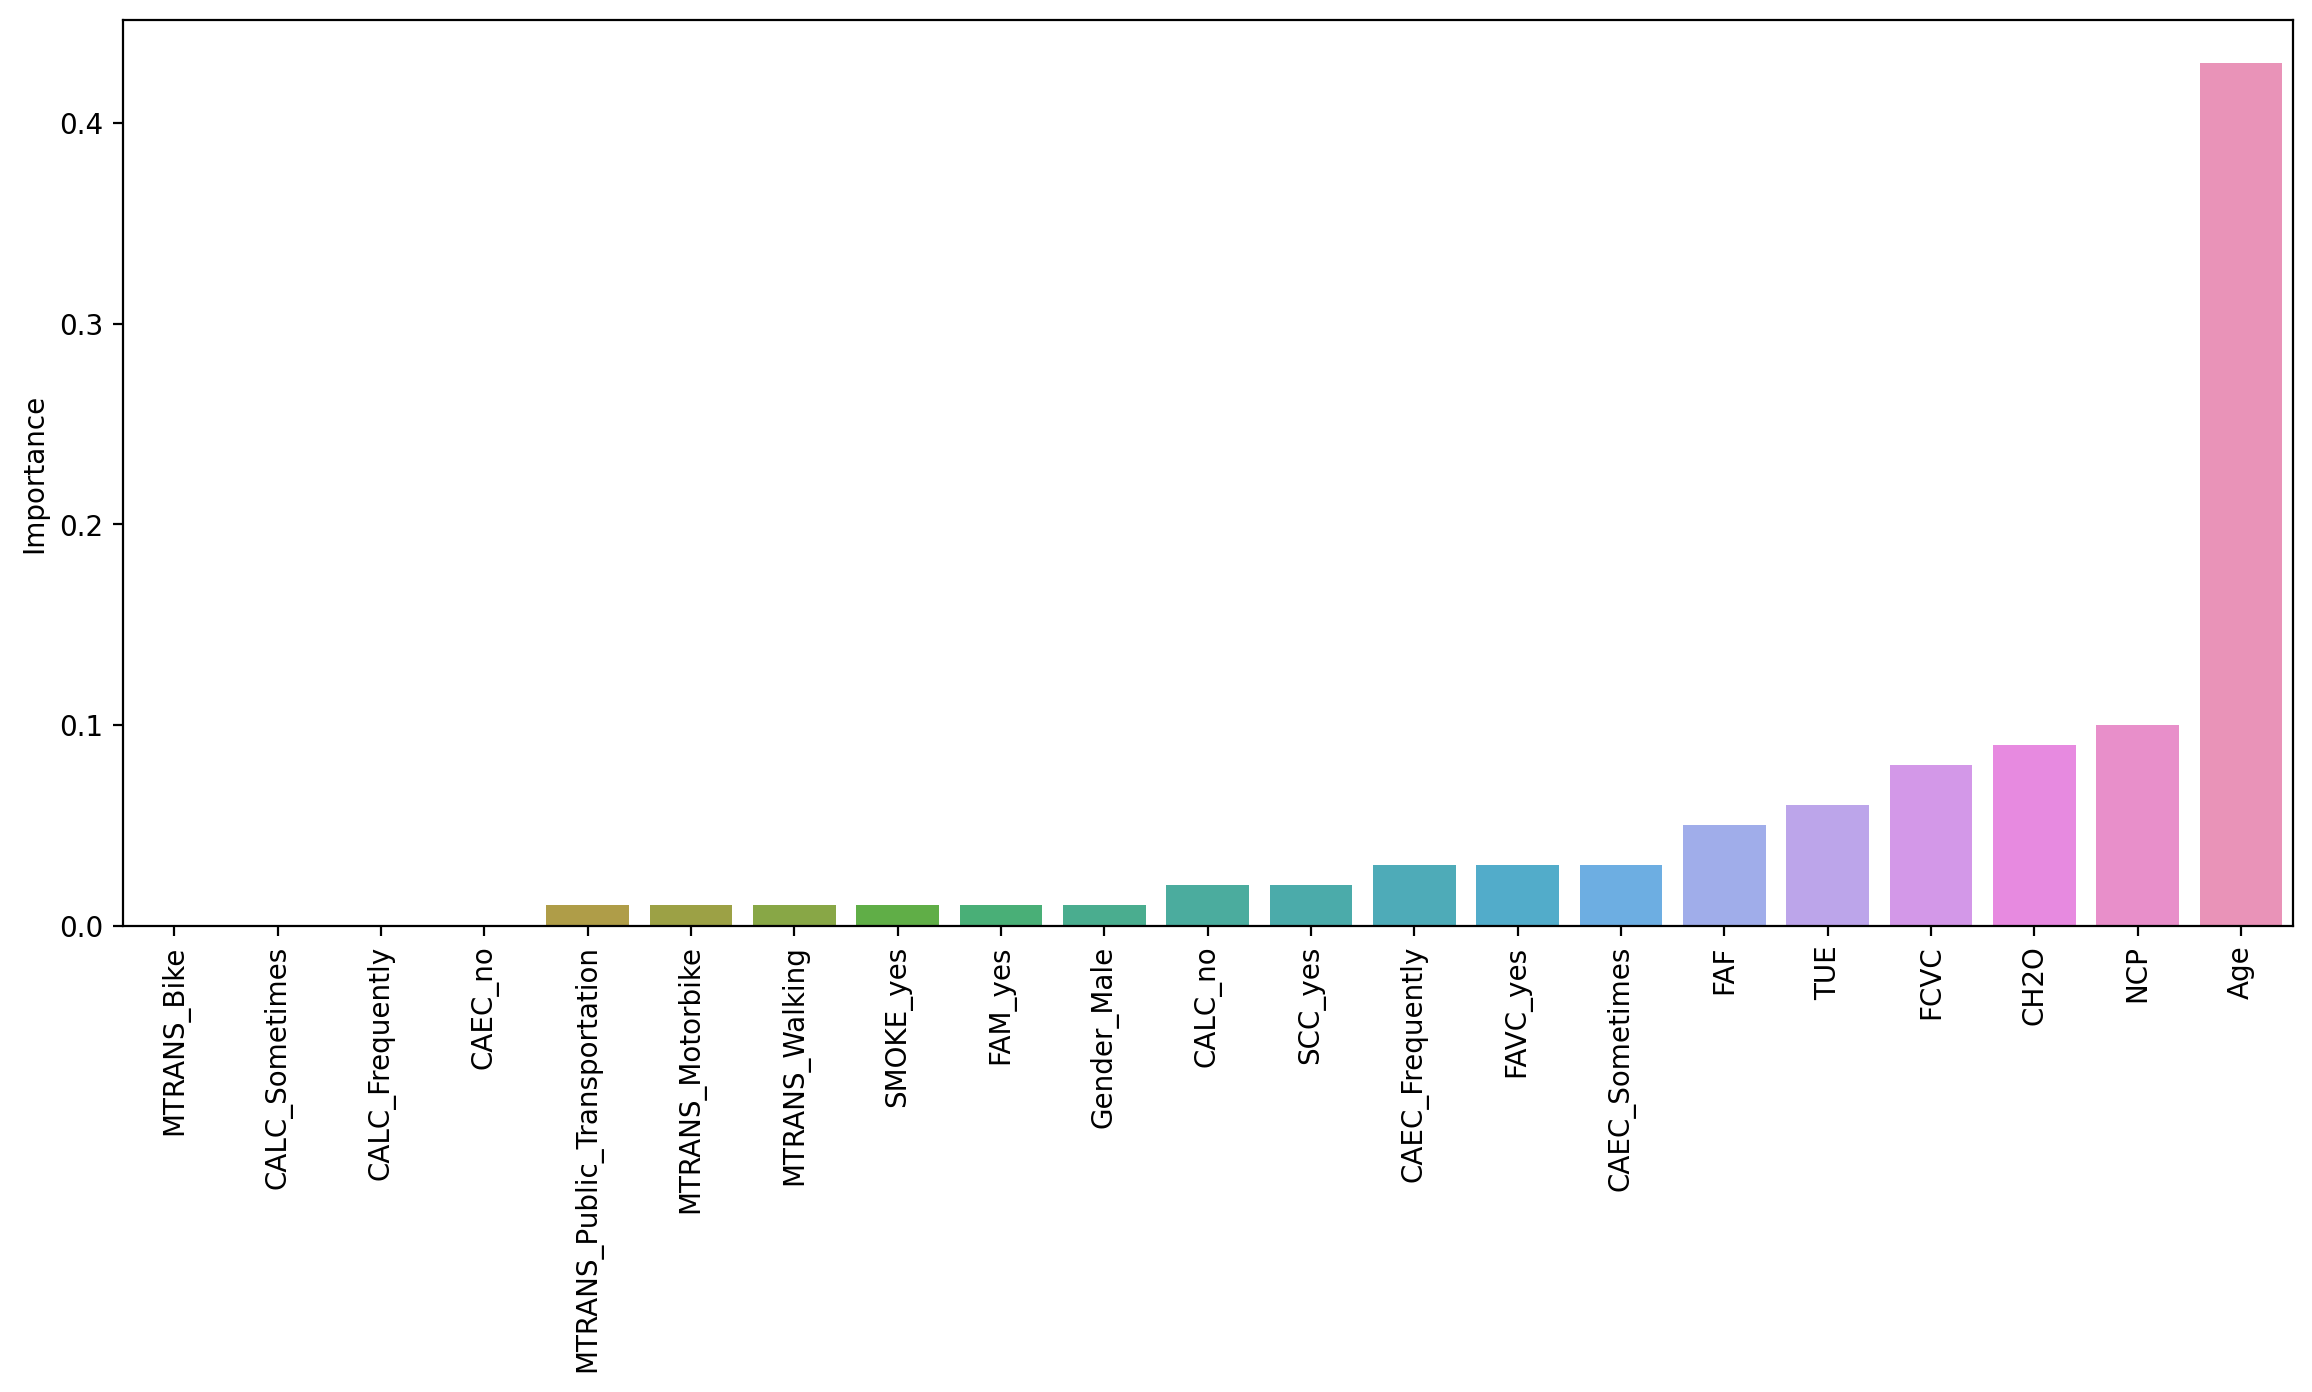

time: 13.7 s (started: 2021-09-13 19:31:15 +08:00)


In [76]:
g = ADB_gcv(True)

Adaboost was also explored, and the top features are `Age`, `no of main meals` and `consumption of water`. The accuracy is low at 79.72%.

## Decision Tree Classifier

In [77]:
############## DECISION TREE ###############

def DT_gcv(plot_coeff=False, max_features='sqrt'):
    import time
    start_time = time.time()

    # TRAIN TEST SPLIT
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)

    # make a model
    from sklearn.tree import DecisionTreeClassifier
    DT = DecisionTreeClassifier()

    # GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid = {'max_depth':[1, 3, 5, 10, 20, 30, 40, 80]}

    grid_model = GridSearchCV(estimator=DT,
                              param_grid=param_grid,
                              cv=5)

    grid_model.fit(X_train,y_train)
    best_params = grid_model.best_params_ # to get the best settings for the model
    best_maxdepth = best_params['max_depth']

    # Use the best settings 
    DT = DecisionTreeClassifier(max_depth=best_maxdepth,
                                     max_features=max_features).fit(X_train,y_train)
    train_acc = DT.score(X_train, y_train)
    val_acc = DT.score(X_val, y_val)
    test_acc = DT.score(X_test, y_test)

    # get the top features
    feat_import = grid_model.best_estimator_.feature_importances_
    imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
    imp_feats.sort_values("Importance",ascending=False)
    top_coeff = imp_feats.index.values[0]
    top3 = imp_feats.index.values[0]
    
    if plot_coeff is True:
        plt.figure(figsize=(14,6),dpi=200)
        sns.barplot(data=imp_feats.sort_values('Importance'),
                    x=imp_feats.sort_values('Importance').index,y='Importance')
        plt.xticks(rotation=90);
    
    model_name = "Decision Tree Classifier"

    run_time = (time.time() - start_time)
    
    print('train accuracy:', train_acc, 'val acc:', val_acc, 'test acc:' ,
          test_acc, best_params, top_coeff)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

    Audio(sound_file, rate = 4410, autoplay=True)

time: 660 µs (started: 2021-09-13 19:31:29 +08:00)


train accuracy: 1.0 val acc: 0.8315789473684211 test acc: 0.7358490566037735 {'max_depth': 20} Age


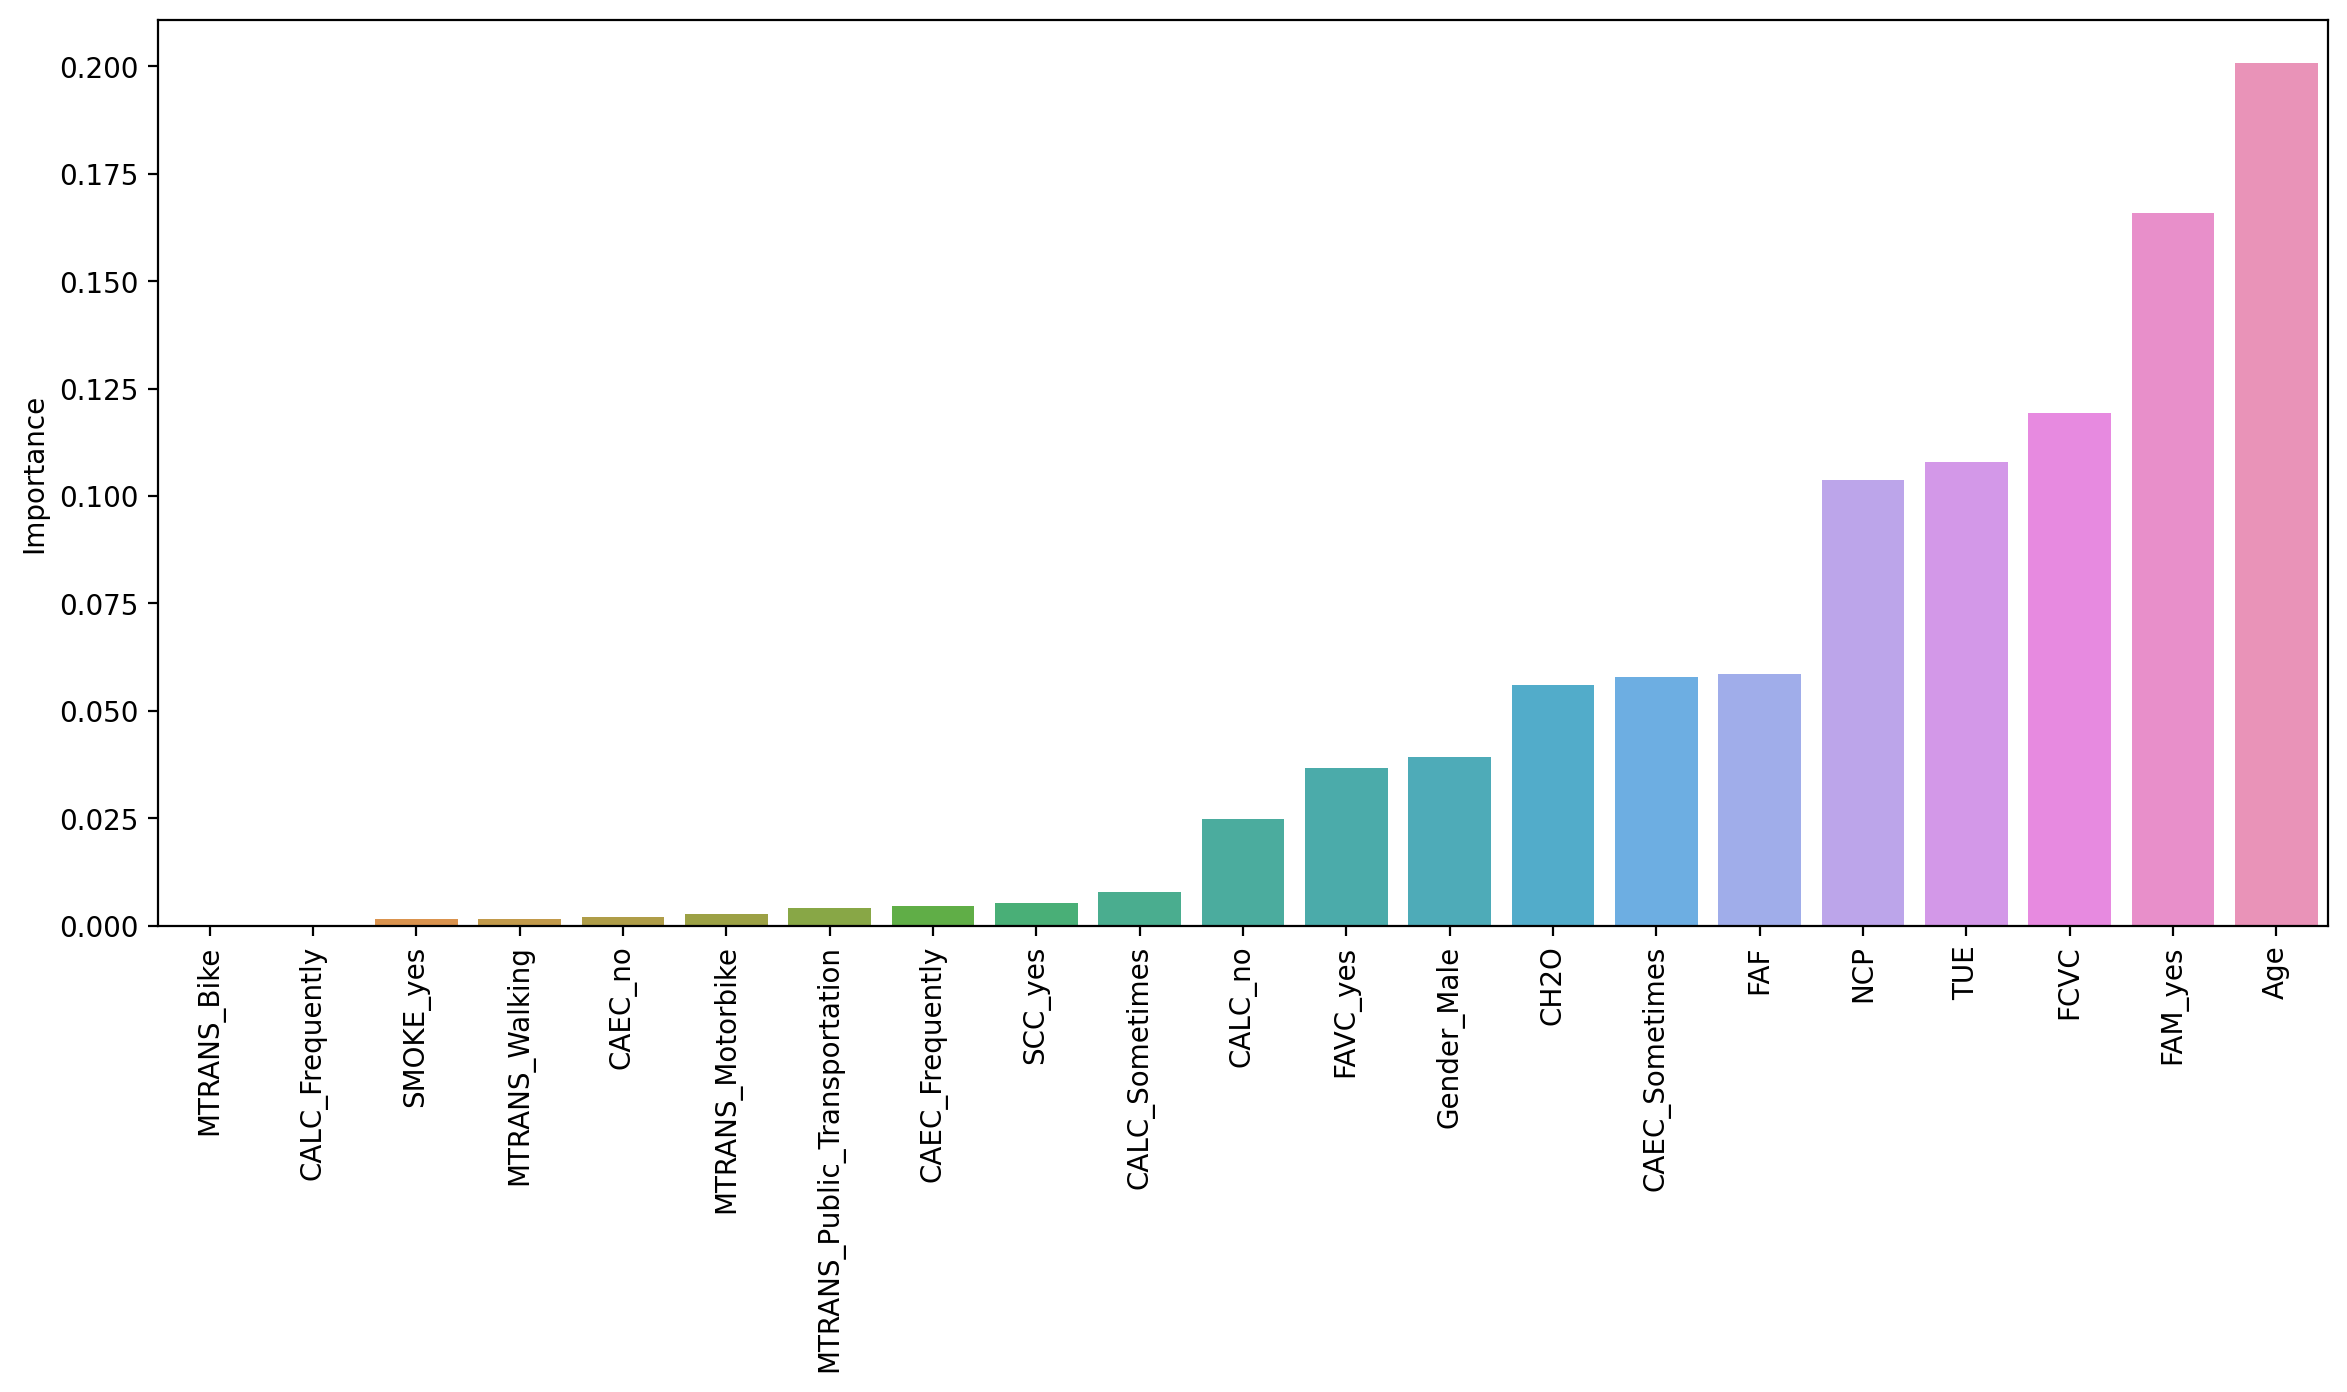

time: 470 ms (started: 2021-09-13 19:31:29 +08:00)


In [78]:
h = DT_gcv(True)

Similar to Random Forest, the most important features in teh Decision Tree Classifer model are `age`, `family history of obesity` and `consumption of fruits and vegetables` (inverse relationship). However, the accuracy is slightly lower at 73.58%.

## Voting Classifier

In [101]:
def VC(voting):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import VotingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import LinearSVC
    from sklearn.svm import SVC
    import time
    start_time = time.time()

    knClf = KNeighborsClassifier(n_neighbors=1)
    svClf = SVC(kernel='rbf', gamma='scale', C=1000)
    rfClf = RandomForestClassifier(n_estimators=100, max_depth=100)
    gbClf = GradientBoostingClassifier(max_depth=10, learning_rate = 0.50)
    adaClf = AdaBoostClassifier(n_estimators=100,learning_rate=0.9)
    dtClf = DecisionTreeClassifier(max_depth=20)

    VC = VotingClassifier(estimators = [('rf',rfClf), ('dt', dtClf), ('gbc',gbClf),
                                      ('ada', adaClf), ('knn', knClf)],
                      voting=voting)

    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                      random_state=42)
    VC.fit(X_train, y_train)
    train_acc = VC.score(X_train, y_train)
    val_acc = VC.score(X_val, y_val)
    test_acc = VC.score(X_test, y_test)
    
    model_name = 'Voting Classifier'
    best_params = 'NA'
    top_coeff = 'NA'
    
    run_time = (time.time() - start_time)

    print(train_acc, val_acc, test_acc)

    return [model_name, train_acc, val_acc, test_acc, best_params,
                top_coeff, run_time]

time: 3.93 ms (started: 2021-09-14 20:17:53 +08:00)


In [111]:
i = VC(voting='soft')

1.0 0.9508771929824561 0.9056603773584906
time: 1.24 s (started: 2021-09-14 20:20:19 +08:00)


In [114]:
j = VC(voting='hard')

1.0 0.9508771929824561 0.910377358490566
time: 1.28 s (started: 2021-09-14 20:20:35 +08:00)


The Voting Classifier was also explored and this resulted to similar accuracy with the GBM for the soft voting. Meanwhile, hard voting results to even higher accuracy at 91.03%.

## Summary of Classifier Models Run Using GridSearchCV

In [115]:
cols = ['ML Model', 'Train Accuracy', 'Validation accuracy',
        'Test accuracy', 'GridsearchCV Best Params',
        'Top predictor variable', 'Run time (seconds)']
df3 = pd.DataFrame(columns=cols)

df3.loc[0] = a
df3.loc[1] = b
df3.loc[2] = c
df3.loc[3] = d
df3.loc[4] = h
df3.loc[5] = g
df3.loc[6] = f
df3.loc[7] = e
df3.loc[8] = i

df3

,ML Model,Train Accuracy,Validation accuracy,Test accuracy,GridsearchCV Best Params,Top predictor variable,Run time (seconds)
0,KNN Classifier,1.000000,0.907018,0.924528,{'n_neighbors': 1},NA,3.462362
1,Logistic Regression,0.764485,0.763158,0.830189,"{'C': 0.75, 'penalty': 'l2'}",FAM_yes,1.757932
2,Linear SVM Classifier,0.766742,0.770175,0.820755,"{'C': 0.1, 'penalty': 'l2'}",FAM_yes,2.234799
3,Nonlinear SVM Classifier,0.983446,0.885965,0.900943,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}",NA,27.466184
4,Decision Tree Classifier,1.000000,0.831579,0.735849,{'max_depth': 20},Age,0.238799
5,AdaBoost Classifier,0.857035,0.833333,0.797170,"{'learning_rate': 0.9, 'n_estimators': 100}",Age,13.508976
6,Random Forest Classifier,0.987208,0.936842,0.900943,"{'max_depth': 10, 'n_estimators': 100}",Age,4.163842
7,GBM Classifier,1.000000,0.947368,0.905660,"{'learning_rate': 0.5, 'max_depth': 10}",Age,79.398555
8,Voting Classifier,1.000000,0.950877,0.905660,NA,NA,1.239412


time: 59.7 ms (started: 2021-09-14 20:21:41 +08:00)


All machine learning models were able to beat the PCC of 62.89% It can be noted that the best params improved the model because we can now do gridsearch and cross validation more efficiently using GridSearchCV!

In [82]:
Audio(sound_file, rate = 4410, autoplay=True)

time: 2.38 ms (started: 2021-09-13 19:31:31 +08:00)


# 5: Conclusion

**RESULTS**

The model with the best accuracy is the `Gradient Boosting Method with LR=0.5 and max_depth=10`, which resulted to a test accuracy of 90.56%, well above the PCC. It may be noted that all ML models used resulted in better estimates compared to the PCC. 

Using GBM as the winning model, `Age` is the top predictor of obesity, followed by `family history of obesity`, `frequency of coonsumption of vegetables` and `time using devices`. For policy making related to obesity, we may want to target increasing consumption of vegetables and lessening time spent in front of gadgets to help lower the obesity rate of a jurisdiction. GBM was used as the final model because even if Voting Classifier performed better when 'hard' voting is used, the improvement is only marginal. Explainability of the model is also a factor that was considered.

**CONTRIBUTION TO CLASS' LEARNING**

New models that were tried include `Adaboost`, which uses an ensemble of weak learners that learn slowly in series. Compared to random forest  this model performed worse , and this may be because when irrelevant features are included it spends too much time learning extreme cases and this can skew results. Another model used was teh `Voting Classifer`, wherein instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class. This slightly performs better than the Gradient Boosting Trees. 


## References

Choudhury, A. (2021, January 18). AdaBoost Vs Gradient Boosting: A Comparison. Analytics India Magazine. https://analyticsindiamag.com/adaboost-vs-gradient-boosting-a-comparison-of-leading-boosting-algorithms/

Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. (2019, August 1). ScienceDirect. https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

Ganiyu, M. (2020, November 6). How VOTing classifiers work! - Towards Data Science. Medium. https://towardsdatascience.com/how-voting-classifiers-work-f1c8e41d30ff

GeeksforGeeks. (2019, November 25). ML | Voting Classifier using Sklearn. https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.

Shen, S. (2021, May 8). Obesity Classification and Data Analysis via Machine Learning. Medium. https://medium.com/geekculture/obesity-classification-and-data-analysis-via-machine-learning-6635682f0f87

Thamrin, S. A. (2021). Predicting Obesity in Adults Using Machine Learning Techniques: An Analysis of Indonesian Basic Health Research 2018. Frontiers. https://www.frontiersin.org/articles/10.3389/fnut.2021.669155/full